# **Data Preparation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('/content/4A_TB_cleaned.xlsx')

In [3]:
data.shape

(16368, 18)

In [4]:
data = pd.concat([data] * 4, ignore_index=True)

In [5]:
data.shape

(65472, 18)

In [6]:
data.head()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
2,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
3,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
4,GI,1868011,F,46,COU,Kampala,"ISS Stage I&II,Disseminated TB,,",IMPROVED,3,Disseminated TB,2,December,Monday,2010,4,CENTRAL,"ISS Stage I&II,,",1


In [7]:
# Converting duration to whole weeks (assuming 7 days per week)
data['Duration (weeks)'] = data['DURATION'].apply(lambda x: int(x // 7 + (x % 7 > 0)))
data['Row\'s week'] = [1, 2, 3, 4] * (len(data) // 4)

In [8]:
# function to calculate the survival status
def calculate_survival_status(row):
    if row['OUT COME'] == 'DIED':
        return 1 if row['Row\'s week'] >= row['Duration (weeks)'] else 0
    else:
        return 0 if row['Row\'s week'] <= row['Duration (weeks)'] else None


data['WEEK'] = data.apply(calculate_survival_status, axis=1)


In [9]:
data.drop(columns=['UNIT','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS','ADDITIONAL WORKING DIAGNOSIS',
                   'MARITAL STATUS', 'IP NUMBER', 'OUT COME', 'Duration (weeks)', 'Row\'s week'], inplace=True)



new_col_order = ['SEX', 'AGE', 'RELIGION', 'REGION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'TB_type',
                 'NUMBER OF PREVIOUS ADMISSIONS', 'DAY OF ADMISSION', 'MONTH OF ADMISSION',
                 'YEAR OF ADMISSION', 'DURATION', 'WEEK']
data = data[new_col_order]

In [10]:
data.head()

,SEX,AGE,RELIGION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,WEEK
0,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,0.0
1,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN
2,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN
3,M,30,COU,CENTRAL,1,Abdominal_TB,5,Tuesday,November,2010,6,NaN
4,F,46,COU,CENTRAL,1,Disseminated TB,3,Monday,December,2010,4,0.0


In [11]:
data.dropna(subset=['WEEK'], inplace=True)
data.reset_index(drop=True, inplace=True)
data['WEEK'] = data['WEEK'].astype(int)

<ipython-input-11-0be89268f7cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['WEEK'], inplace=True)
<ipython-input-11-0be89268f7cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WEEK'] = data['WEEK'].astype(int)


In [12]:
data.shape

(39064, 12)

In [13]:
data['WEEK'].value_counts()

WEEK
0    20864
1    18200
Name: count, dtype: int64

#**Preprocessing**

In [14]:
# dictionary for month encoding
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# dictionary for day of week encoding
day_mapping = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':76 }

data['Month of Admission'] = data['MONTH OF ADMISSION'].map(month_mapping)
data['Day of Admission'] = data['DAY OF ADMISSION'].map(day_mapping)

data.drop(columns=['MONTH OF ADMISSION', 'DAY OF ADMISSION'], inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

textual_columns = ['SEX', 'RELIGION', 'TB_type', 'REGION']

# Encoding textual data
encoder = LabelEncoder()
for col in textual_columns:
    data[col] = encoder.fit_transform(data[col])

In [16]:
data.head()

,SEX,AGE,RELIGION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,WEEK,Month of Admission,Day of Admission
0,1,30,1,0,1,0,5,2010,6,0,11,3
1,0,46,1,0,1,2,3,2010,4,0,12,2
2,1,80,2,0,2,0,7,2010,8,0,12,4
3,1,80,2,0,2,0,7,2010,8,0,12,4
4,1,22,0,0,0,0,8,2010,9,0,12,2


In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

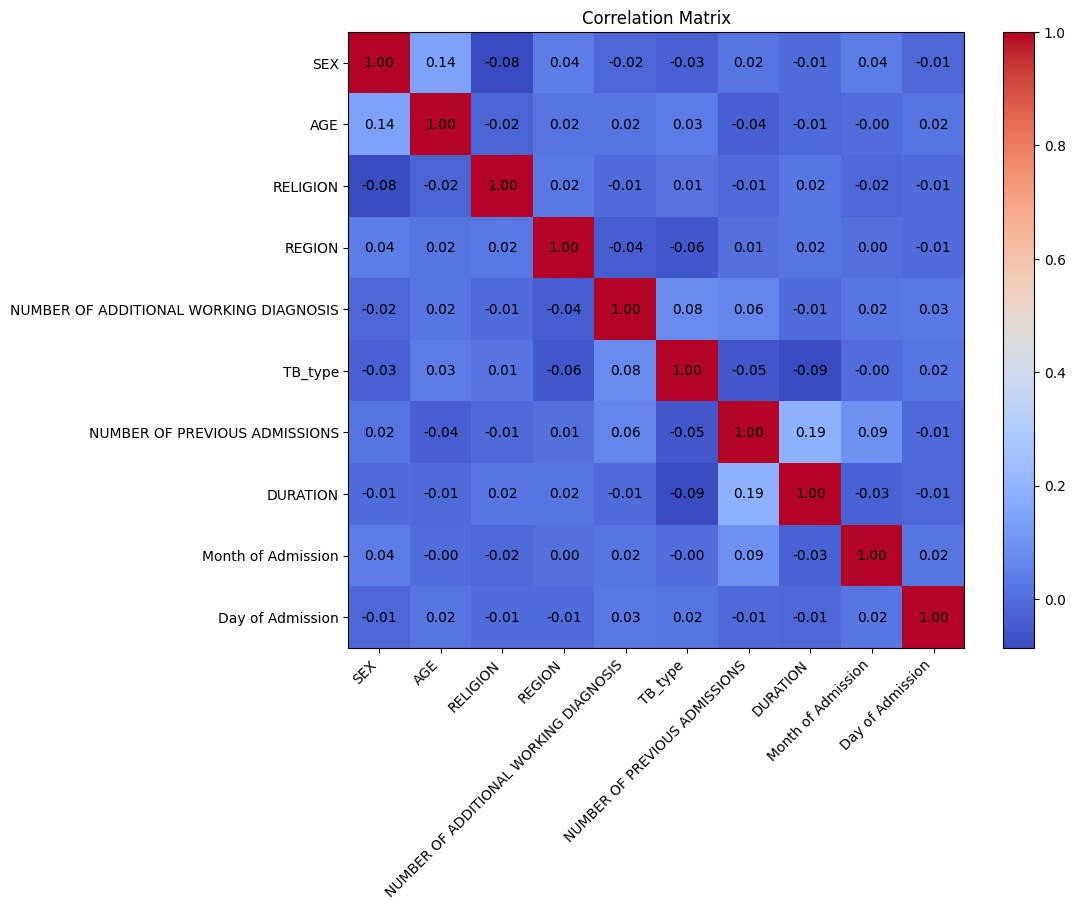

In [18]:
columns = ['SEX', 'AGE', 'RELIGION', 'REGION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS',
           'TB_type', 'NUMBER OF PREVIOUS ADMISSIONS', 'DURATION', 'Month of Admission', 'Day of Admission']
correlation_matrix = data[columns].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

for i in range(len(columns)):
    for j in range(len(columns)):
        plt.text(i, j, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center')

plt.xticks(range(len(columns)), columns, rotation=45, ha='right')
plt.yticks(range(len(columns)), columns)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# from sklearn.preprocessing import MinMaxScaler

# #Normalizing and Standardizing continuous features
# normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
# scaler = MinMaxScaler()
# data[normalise_features] = scaler.fit_transform(data[normalise_features])

In [20]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in a NumPy array or pandas DataFrame named 'data'
scaler = StandardScaler()

# Fit the scaler to the data (calculate mean and standard deviation)
scaler.fit(data)

# Transform the data using the fitted scaler (center and scale)
standardized_data = scaler.transform(data)


In [21]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in a NumPy array or pandas DataFrame named 'data'
scaler = StandardScaler()
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
data[normalise_features] = scaler.fit_transform(data[normalise_features])

In [22]:
data.head()

,SEX,AGE,RELIGION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,WEEK,Month of Admission,Day of Admission
0,1,-0.499157,1,0,-0.768999,0,0.671691,2010,-0.376849,0,11,3
1,0,0.973860,1,0,-0.768999,2,0.263214,2010,-0.588397,0,12,2
2,1,4.104020,2,0,0.514769,0,1.080168,2010,-0.165300,0,12,4
3,1,4.104020,2,0,0.514769,0,1.080168,2010,-0.165300,0,12,4
4,1,-1.235665,0,0,-2.052767,0,1.284406,2010,-0.059526,0,12,2


# **Modal Training**

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

In [28]:
# Separate features and target
X = data.drop(columns=['WEEK'])
y = data['WEEK']


# Prepare target for multitask learning
num_weeks = 4  # Assuming 4 weeks as tasks
y_multitask = np.zeros((X.shape[0], num_weeks))
for i in range(num_weeks):
    y_multitask[:, i] = y == i

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y_multitask, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTETomek
smote_tomek = SMOTETomek()
X_train_res, y_train_res_flat = smote_tomek.fit_resample(X_train, y_train.argmax(axis=1))

# Convert y_train_res_flat back to multitask format
y_train_res = np.zeros((X_train_res.shape[0], num_weeks))
for i in range(num_weeks):
    y_train_res[:, i] = (y_train_res_flat == i).astype(int)

# Define the model
def create_multitask_logistic_regression(input_dim, num_tasks):
    inputs = Input(shape=(input_dim,))
    shared_layer = layers.Dense(128, activation='relu')(inputs)
    shared_layer = layers.Dropout(0.5)(shared_layer)
    outputs = [layers.Dense(1, activation='sigmoid', name=f'week_{i+1}')(shared_layer) for i in range(num_tasks)]
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_dim = X.shape[1]
num_tasks = num_weeks

model = create_multitask_logistic_regression(input_dim, num_tasks)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define custom callback for F1 score, AUPRC, and accuracy
class Metrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_pred = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]

        f1_scores = []
        auprcs = []
        accuracies = []

        for i in range(num_tasks):
            y_true = val_true[:, i]
            y_pred = (val_pred[i] > 0.5).astype(int)
            f1 = f1_score(y_true, y_pred)
            auprc = average_precision_score(y_true, val_pred[i])
            accuracy = accuracy_score(y_true, y_pred)
            f1_scores.append(f1)
            auprcs.append(auprc)
            accuracies.append(accuracy)

        avg_f1 = sum(f1_scores) / num_tasks
        avg_auprc = sum(auprcs) / num_tasks
        avg_accuracy = sum(accuracies) / num_tasks

        print(f"Epoch {epoch+1}: Avg F1-Score: {avg_f1:.4f}, Avg AUPRC: {avg_auprc:.4f}, Avg Accuracy: {avg_accuracy:.4f}")

        logs['val_avg_f1'] = avg_f1
        logs['val_avg_auprc'] = avg_auprc
        logs['val_avg_accuracy'] = avg_accuracy

metrics_callback = Metrics()
metrics_callback.validation_data = (X_val, y_val)

# Fit the model
history = model.fit(
    X_train_res, [y_train_res[:, i] for i in range(num_tasks)],
    epochs=100,
    batch_size=32,
    validation_data=(X_val, [y_val[:, i] for i in range(num_tasks)]),
    callbacks=[metrics_callback],
    verbose=1
)





Epoch 1/100
245/245 [==============================] - 0s 1ms/step
Epoch 1: Avg F1-Score: 0.1759, Avg AUPRC: 0.3226, Avg Accuracy: 0.7713
1040/1040 [==============================] - 6s 4ms/step - loss: 37.7644 - week_1_loss: 16.3504 - week_2_loss: 16.7321 - week_3_loss: 2.2913 - week_4_loss: 2.3905 - week_1_accuracy: 0.5104 - week_2_accuracy: 0.5014 - week_3_accuracy: 0.9826 - week_4_accuracy: 0.9835 - val_loss: 1.3659 - val_week_1_loss: 0.6771 - val_week_2_loss: 0.6888 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5426 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1759 - val_avg_auprc: 0.3226 - val_avg_accuracy: 0.7713
Epoch 2/100
  71/1040 [=>............................] - ETA: 2s - loss: 1.7986 - week_1_loss: 0.8331 - week_2_loss: 0.8493 - week_3_loss: 0.0377 - week_4_loss: 0.0784 - week_1_accuracy: 0.5026 - week_2_accuracy: 0.4890 - week_3_accuracy: 0.9982 - week_4_accuracy: 0.9969

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 2: Avg F1-Score: 0.1759, Avg AUPRC: 0.3530, Avg Accuracy: 0.7713
1040/1040 [==============================] - 5s 5ms/step - loss: 1.6164 - week_1_loss: 0.7812 - week_2_loss: 0.7845 - week_3_loss: 0.0293 - week_4_loss: 0.0213 - week_1_accuracy: 0.5179 - week_2_accuracy: 0.5113 - week_3_accuracy: 0.9987 - week_4_accuracy: 0.9991 - val_loss: 1.6260 - val_week_1_loss: 0.8047 - val_week_2_loss: 0.8213 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5426 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1759 - val_avg_auprc: 0.3530 - val_avg_accuracy: 0.7713
Epoch 3/100
  44/1040 [>.............................] - ETA: 3s - loss: 1.6600 - week_1_loss: 0.8039 - week_2_loss: 0.8038 - week_3_loss: 0.0350 - week_4_loss: 0.0172 - week_1_accuracy: 0.5178 - week_2_accuracy: 0.5121 - week_3_accuracy: 0.9979 - week_4_accuracy: 0.9993

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 3: Avg F1-Score: 0.1759, Avg AUPRC: 0.3527, Avg Accuracy: 0.7713
1040/1040 [==============================] - 5s 4ms/step - loss: 1.4867 - week_1_loss: 0.7382 - week_2_loss: 0.7373 - week_3_loss: 0.0076 - week_4_loss: 0.0037 - week_1_accuracy: 0.5352 - week_2_accuracy: 0.5305 - week_3_accuracy: 0.9994 - week_4_accuracy: 0.9997 - val_loss: 1.6853 - val_week_1_loss: 0.8397 - val_week_2_loss: 0.8456 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5426 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1759 - val_avg_auprc: 0.3527 - val_avg_accuracy: 0.7713
Epoch 4/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.4751 - week_1_loss: 0.7313 - week_2_loss: 0.7352 - week_3_loss: 0.0087 - week_4_loss: 7.7013e-12 - week_1_accuracy: 0.5317 - week_2_accuracy: 0.5248 - week_3_accuracy: 0.9995 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 4: Avg F1-Score: 0.3404, Avg AUPRC: 0.3702, Avg Accuracy: 0.8395
1040/1040 [==============================] - 4s 3ms/step - loss: 1.4090 - week_1_loss: 0.7014 - week_2_loss: 0.7022 - week_3_loss: 0.0023 - week_4_loss: 0.0031 - week_1_accuracy: 0.5589 - week_2_accuracy: 0.5548 - week_3_accuracy: 0.9997 - week_4_accuracy: 0.9998 - val_loss: 1.2593 - val_week_1_loss: 0.6276 - val_week_2_loss: 0.6317 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.6785 - val_week_2_accuracy: 0.6795 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3404 - val_avg_auprc: 0.3702 - val_avg_accuracy: 0.8395
Epoch 5/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.4074 - week_1_loss: 0.7035 - week_2_loss: 0.7038 - week_3_loss: 1.3769e-09 - week_4_loss: 6.7795e-05 - week_1_accuracy: 0.5308 - week_2_accuracy: 0.5279 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 5: Avg F1-Score: 0.1759, Avg AUPRC: 0.3708, Avg Accuracy: 0.7713
1040/1040 [==============================] - 5s 5ms/step - loss: 1.3504 - week_1_loss: 0.6744 - week_2_loss: 0.6745 - week_3_loss: 7.7737e-04 - week_4_loss: 8.1513e-04 - week_1_accuracy: 0.5732 - week_2_accuracy: 0.5719 - week_3_accuracy: 0.9997 - week_4_accuracy: 0.9998 - val_loss: 1.2938 - val_week_1_loss: 0.6467 - val_week_2_loss: 0.6471 - val_week_3_loss: 0.0000e+00 - val_week_4_loss: 0.0000e+00 - val_week_1_accuracy: 0.5426 - val_week_2_accuracy: 0.5426 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.1759 - val_avg_auprc: 0.3708 - val_avg_accuracy: 0.7713
Epoch 6/100
  29/1040 [..............................] - ETA: 5s - loss: 1.3605 - week_1_loss: 0.6801 - week_2_loss: 0.6802 - week_3_loss: 5.0840e-06 - week_4_loss: 9.4794e-05 - week_1_accuracy: 0.5496 - week_2_accuracy: 0.5517 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 6: Avg F1-Score: 0.3469, Avg AUPRC: 0.3677, Avg Accuracy: 0.8469
1040/1040 [==============================] - 8s 8ms/step - loss: 1.3186 - week_1_loss: 0.6589 - week_2_loss: 0.6588 - week_3_loss: 4.2449e-04 - week_4_loss: 4.4995e-04 - week_1_accuracy: 0.5939 - week_2_accuracy: 0.5948 - week_3_accuracy: 0.9999 - week_4_accuracy: 0.9998 - val_loss: 1.2167 - val_week_1_loss: 0.6083 - val_week_2_loss: 0.6083 - val_week_3_loss: 6.1591e-19 - val_week_4_loss: 4.5658e-13 - val_week_1_accuracy: 0.6938 - val_week_2_accuracy: 0.6938 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3469 - val_avg_auprc: 0.3677 - val_avg_accuracy: 0.8469
Epoch 7/100
  15/1040 [..............................] - ETA: 7s - loss: 1.2382 - week_1_loss: 0.6189 - week_2_loss: 0.6189 - week_3_loss: 2.1246e-04 - week_4_loss: 1.5449e-04 - week_1_accuracy: 0.6687 - week_2_accuracy: 0.6667 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 7: Avg F1-Score: 0.3348, Avg AUPRC: 0.3770, Avg Accuracy: 0.8410
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2847 - week_1_loss: 0.6416 - week_2_loss: 0.6416 - week_3_loss: 5.5378e-04 - week_4_loss: 9.6494e-04 - week_1_accuracy: 0.6267 - week_2_accuracy: 0.6269 - week_3_accuracy: 0.9999 - week_4_accuracy: 0.9997 - val_loss: 1.2326 - val_week_1_loss: 0.6164 - val_week_2_loss: 0.6163 - val_week_3_loss: 1.9803e-12 - val_week_4_loss: 5.9389e-07 - val_week_1_accuracy: 0.6818 - val_week_2_accuracy: 0.6822 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3348 - val_avg_auprc: 0.3770 - val_avg_accuracy: 0.8410
Epoch 8/100
  39/1040 [>.............................] - ETA: 4s - loss: 1.4016 - week_1_loss: 0.6947 - week_2_loss: 0.6949 - week_3_loss: 5.9377e-04 - week_4_loss: 0.0115 - week_1_accuracy: 0.5481 - week_2_accuracy: 0.5505 - week_3_accuracy: 1.0000 - week_4_accuracy: 0.9984

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 3ms/step
Epoch 8: Avg F1-Score: 0.2789, Avg AUPRC: 0.3555, Avg Accuracy: 0.7965
1040/1040 [==============================] - 7s 7ms/step - loss: 1.2996 - week_1_loss: 0.6481 - week_2_loss: 0.6481 - week_3_loss: 0.0010 - week_4_loss: 0.0024 - week_1_accuracy: 0.6159 - week_2_accuracy: 0.6165 - week_3_accuracy: 1.0000 - week_4_accuracy: 0.9997 - val_loss: 1.2993 - val_week_1_loss: 0.6496 - val_week_2_loss: 0.6498 - val_week_3_loss: 6.8064e-14 - val_week_4_loss: 4.6370e-12 - val_week_1_accuracy: 0.5930 - val_week_2_accuracy: 0.5929 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2789 - val_avg_auprc: 0.3555 - val_avg_accuracy: 0.7965
Epoch 9/100
  21/1040 [..............................] - ETA: 5s - loss: 1.2917 - week_1_loss: 0.6434 - week_2_loss: 0.6434 - week_3_loss: 0.0018 - week_4_loss: 0.0030 - week_1_accuracy: 0.6131 - week_2_accuracy: 0.6161 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 9: Avg F1-Score: 0.3443, Avg AUPRC: 0.3775, Avg Accuracy: 0.8448
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2775 - week_1_loss: 0.6376 - week_2_loss: 0.6376 - week_3_loss: 9.9554e-04 - week_4_loss: 0.0013 - week_1_accuracy: 0.6349 - week_2_accuracy: 0.6350 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2327 - val_week_1_loss: 0.6164 - val_week_2_loss: 0.6163 - val_week_3_loss: 1.3697e-09 - val_week_4_loss: 1.2765e-07 - val_week_1_accuracy: 0.6899 - val_week_2_accuracy: 0.6894 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3443 - val_avg_auprc: 0.3775 - val_avg_accuracy: 0.8448
Epoch 10/100
  38/1040 [>.............................] - ETA: 4s - loss: 1.3180 - week_1_loss: 0.6578 - week_2_loss: 0.6578 - week_3_loss: 0.0010 - week_4_loss: 0.0014 - week_1_accuracy: 0.5962 - week_2_accuracy: 0.5962 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 10: Avg F1-Score: 0.3466, Avg AUPRC: 0.3787, Avg Accuracy: 0.8466
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2876 - week_1_loss: 0.6417 - week_2_loss: 0.6417 - week_3_loss: 0.0018 - week_4_loss: 0.0023 - week_1_accuracy: 0.6269 - week_2_accuracy: 0.6269 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1956 - val_week_1_loss: 0.5978 - val_week_2_loss: 0.5978 - val_week_3_loss: 1.1759e-08 - val_week_4_loss: 4.9723e-07 - val_week_1_accuracy: 0.6932 - val_week_2_accuracy: 0.6933 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3466 - val_avg_auprc: 0.3787 - val_avg_accuracy: 0.8466
Epoch 11/100
  67/1040 [>.............................] - ETA: 2s - loss: 1.2753 - week_1_loss: 0.6359 - week_2_loss: 0.6359 - week_3_loss: 0.0013 - week_4_loss: 0.0021 - week_1_accuracy: 0.6329 - week_2_accuracy: 0.6329 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 11: Avg F1-Score: 0.3343, Avg AUPRC: 0.3790, Avg Accuracy: 0.8417
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2726 - week_1_loss: 0.6345 - week_2_loss: 0.6345 - week_3_loss: 0.0016 - week_4_loss: 0.0019 - week_1_accuracy: 0.6437 - week_2_accuracy: 0.6438 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1849 - val_week_1_loss: 0.5924 - val_week_2_loss: 0.5925 - val_week_3_loss: 2.8518e-06 - val_week_4_loss: 1.7456e-05 - val_week_1_accuracy: 0.6835 - val_week_2_accuracy: 0.6835 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3343 - val_avg_auprc: 0.3790 - val_avg_accuracy: 0.8417
Epoch 12/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.3068 - week_1_loss: 0.6515 - week_2_loss: 0.6515 - week_3_loss: 0.0018 - week_4_loss: 0.0020 - week_1_accuracy: 0.6240 - week_2_accuracy: 0.6240 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 12: Avg F1-Score: 0.3430, Avg AUPRC: 0.3775, Avg Accuracy: 0.8436
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2663 - week_1_loss: 0.6306 - week_2_loss: 0.6306 - week_3_loss: 0.0025 - week_4_loss: 0.0026 - week_1_accuracy: 0.6428 - week_2_accuracy: 0.6429 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1923 - val_week_1_loss: 0.5960 - val_week_2_loss: 0.5960 - val_week_3_loss: 4.4289e-05 - val_week_4_loss: 2.1913e-04 - val_week_1_accuracy: 0.6872 - val_week_2_accuracy: 0.6872 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3430 - val_avg_auprc: 0.3775 - val_avg_accuracy: 0.8436
Epoch 13/100
  46/1040 [>.............................] - ETA: 3s - loss: 1.2647 - week_1_loss: 0.6290 - week_2_loss: 0.6290 - week_3_loss: 0.0033 - week_4_loss: 0.0034 - week_1_accuracy: 0.6529 - week_2_accuracy: 0.6529 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 13: Avg F1-Score: 0.2972, Avg AUPRC: 0.3714, Avg Accuracy: 0.8083
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2574 - week_1_loss: 0.6259 - week_2_loss: 0.6259 - week_3_loss: 0.0029 - week_4_loss: 0.0028 - week_1_accuracy: 0.6532 - week_2_accuracy: 0.6533 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2574 - val_week_1_loss: 0.6274 - val_week_2_loss: 0.6274 - val_week_3_loss: 0.0015 - val_week_4_loss: 0.0011 - val_week_1_accuracy: 0.6165 - val_week_2_accuracy: 0.6165 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2972 - val_avg_auprc: 0.3714 - val_avg_accuracy: 0.8083
Epoch 14/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2686 - week_1_loss: 0.6293 - week_2_loss: 0.6293 - week_3_loss: 0.0051 - week_4_loss: 0.0050 - week_1_accuracy: 0.6472 - week_2_accuracy: 0.6472 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 14: Avg F1-Score: 0.3415, Avg AUPRC: 0.3674, Avg Accuracy: 0.8425
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2694 - week_1_loss: 0.6310 - week_2_loss: 0.6310 - week_3_loss: 0.0038 - week_4_loss: 0.0035 - week_1_accuracy: 0.6472 - week_2_accuracy: 0.6472 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2027 - val_week_1_loss: 0.5983 - val_week_2_loss: 0.5983 - val_week_3_loss: 0.0030 - val_week_4_loss: 0.0030 - val_week_1_accuracy: 0.6850 - val_week_2_accuracy: 0.6850 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3415 - val_avg_auprc: 0.3674 - val_avg_accuracy: 0.8425
Epoch 15/100
  68/1040 [>.............................] - ETA: 2s - loss: 1.2816 - week_1_loss: 0.6372 - week_2_loss: 0.6372 - week_3_loss: 0.0037 - week_4_loss: 0.0035 - week_1_accuracy: 0.6457 - week_2_accuracy: 0.6457 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 15: Avg F1-Score: 0.3046, Avg AUPRC: 0.3774, Avg Accuracy: 0.8135
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2676 - week_1_loss: 0.6316 - week_2_loss: 0.6316 - week_3_loss: 0.0022 - week_4_loss: 0.0021 - week_1_accuracy: 0.6483 - week_2_accuracy: 0.6483 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2413 - val_week_1_loss: 0.6196 - val_week_2_loss: 0.6196 - val_week_3_loss: 9.8606e-04 - val_week_4_loss: 0.0012 - val_week_1_accuracy: 0.6270 - val_week_2_accuracy: 0.6270 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3046 - val_avg_auprc: 0.3774 - val_avg_accuracy: 0.8135
Epoch 16/100
  24/1040 [..............................] - ETA: 4s - loss: 1.2381 - week_1_loss: 0.6176 - week_2_loss: 0.6176 - week_3_loss: 0.0015 - week_4_loss: 0.0014 - week_1_accuracy: 0.6484 - week_2_accuracy: 0.6484 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 16: Avg F1-Score: 0.3056, Avg AUPRC: 0.3720, Avg Accuracy: 0.8142
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2679 - week_1_loss: 0.6327 - week_2_loss: 0.6327 - week_3_loss: 0.0013 - week_4_loss: 0.0012 - week_1_accuracy: 0.6467 - week_2_accuracy: 0.6467 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2353 - val_week_1_loss: 0.6168 - val_week_2_loss: 0.6168 - val_week_3_loss: 7.8345e-04 - val_week_4_loss: 8.0088e-04 - val_week_1_accuracy: 0.6284 - val_week_2_accuracy: 0.6284 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3056 - val_avg_auprc: 0.3720 - val_avg_accuracy: 0.8142
Epoch 17/100
  71/1040 [=>............................] - ETA: 2s - loss: 1.2551 - week_1_loss: 0.6267 - week_2_loss: 0.6267 - week_3_loss: 8.6400e-04 - week_4_loss: 8.1264e-04 - week_1_accuracy: 0.6483 - week_2_accuracy: 0.6483 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 17: Avg F1-Score: 0.3160, Avg AUPRC: 0.3702, Avg Accuracy: 0.8218
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2530 - week_1_loss: 0.6258 - week_2_loss: 0.6258 - week_3_loss: 6.8249e-04 - week_4_loss: 6.4422e-04 - week_1_accuracy: 0.6547 - week_2_accuracy: 0.6547 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2285 - val_week_1_loss: 0.6138 - val_week_2_loss: 0.6138 - val_week_3_loss: 4.7586e-04 - val_week_4_loss: 4.8026e-04 - val_week_1_accuracy: 0.6435 - val_week_2_accuracy: 0.6435 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3160 - val_avg_auprc: 0.3702 - val_avg_accuracy: 0.8218
Epoch 18/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2652 - week_1_loss: 0.6321 - week_2_loss: 0.6321 - week_3_loss: 5.0872e-04 - week_4_loss: 4.8264e-04 - week_1_accuracy: 0.6438 - week_2_accuracy: 0.6438 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 18: Avg F1-Score: 0.3255, Avg AUPRC: 0.3697, Avg Accuracy: 0.8293
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2538 - week_1_loss: 0.6265 - week_2_loss: 0.6265 - week_3_loss: 4.2658e-04 - week_4_loss: 4.0318e-04 - week_1_accuracy: 0.6537 - week_2_accuracy: 0.6537 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2096 - val_week_1_loss: 0.6045 - val_week_2_loss: 0.6045 - val_week_3_loss: 3.1186e-04 - val_week_4_loss: 3.1534e-04 - val_week_1_accuracy: 0.6585 - val_week_2_accuracy: 0.6585 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3255 - val_avg_auprc: 0.3697 - val_avg_accuracy: 0.8293
Epoch 19/100
  41/1040 [>.............................] - ETA: 3s - loss: 1.2088 - week_1_loss: 0.6041 - week_2_loss: 0.6041 - week_3_loss: 3.3366e-04 - week_4_loss: 3.1705e-04 - week_1_accuracy: 0.6768 - week_2_accuracy: 0.6768 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 19: Avg F1-Score: 0.3499, Avg AUPRC: 0.3765, Avg Accuracy: 0.8503
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2593 - week_1_loss: 0.6294 - week_2_loss: 0.6294 - week_3_loss: 2.9155e-04 - week_4_loss: 2.7407e-04 - week_1_accuracy: 0.6478 - week_2_accuracy: 0.6478 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1694 - val_week_1_loss: 0.5846 - val_week_2_loss: 0.5846 - val_week_3_loss: 1.1646e-04 - val_week_4_loss: 1.1796e-04 - val_week_1_accuracy: 0.7006 - val_week_2_accuracy: 0.7006 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3499 - val_avg_auprc: 0.3765 - val_avg_accuracy: 0.8503
Epoch 20/100
  68/1040 [>.............................] - ETA: 2s - loss: 1.2724 - week_1_loss: 0.6360 - week_2_loss: 0.6360 - week_3_loss: 2.2121e-04 - week_4_loss: 2.0954e-04 - week_1_accuracy: 0.6452 - week_2_accuracy: 0.6452 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 20: Avg F1-Score: 0.3397, Avg AUPRC: 0.3730, Avg Accuracy: 0.8409
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2525 - week_1_loss: 0.6261 - week_2_loss: 0.6261 - week_3_loss: 1.7558e-04 - week_4_loss: 1.6597e-04 - week_1_accuracy: 0.6556 - week_2_accuracy: 0.6556 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1907 - val_week_1_loss: 0.5953 - val_week_2_loss: 0.5953 - val_week_3_loss: 1.1254e-04 - val_week_4_loss: 1.1106e-04 - val_week_1_accuracy: 0.6818 - val_week_2_accuracy: 0.6818 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3397 - val_avg_auprc: 0.3730 - val_avg_accuracy: 0.8409
Epoch 21/100
  68/1040 [>.............................] - ETA: 2s - loss: 1.2577 - week_1_loss: 0.6287 - week_2_loss: 0.6287 - week_3_loss: 1.4123e-04 - week_4_loss: 1.3273e-04 - week_1_accuracy: 0.6489 - week_2_accuracy: 0.6489 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 21: Avg F1-Score: 0.3227, Avg AUPRC: 0.3655, Avg Accuracy: 0.8270
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2526 - week_1_loss: 0.6262 - week_2_loss: 0.6262 - week_3_loss: 1.1281e-04 - week_4_loss: 1.0580e-04 - week_1_accuracy: 0.6525 - week_2_accuracy: 0.6525 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2180 - val_week_1_loss: 0.6089 - val_week_2_loss: 0.6089 - val_week_3_loss: 9.5395e-05 - val_week_4_loss: 8.6880e-05 - val_week_1_accuracy: 0.6539 - val_week_2_accuracy: 0.6539 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3227 - val_avg_auprc: 0.3655 - val_avg_accuracy: 0.8270
Epoch 22/100
  50/1040 [>.............................] - ETA: 3s - loss: 1.2787 - week_1_loss: 0.6392 - week_2_loss: 0.6392 - week_3_loss: 1.0230e-04 - week_4_loss: 9.5952e-05 - week_1_accuracy: 0.6356 - week_2_accuracy: 0.6356 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 22: Avg F1-Score: 0.3516, Avg AUPRC: 0.3790, Avg Accuracy: 0.8516
1040/1040 [==============================] - 7s 7ms/step - loss: 1.2492 - week_1_loss: 0.6245 - week_2_loss: 0.6245 - week_3_loss: 7.6046e-05 - week_4_loss: 7.1289e-05 - week_1_accuracy: 0.6570 - week_2_accuracy: 0.6570 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1868 - val_week_1_loss: 0.5934 - val_week_2_loss: 0.5934 - val_week_3_loss: 2.8381e-05 - val_week_4_loss: 2.4100e-05 - val_week_1_accuracy: 0.7032 - val_week_2_accuracy: 0.7032 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3516 - val_avg_auprc: 0.3790 - val_avg_accuracy: 0.8516
Epoch 23/100
  69/1040 [>.............................] - ETA: 2s - loss: 1.2770 - week_1_loss: 0.6384 - week_2_loss: 0.6384 - week_3_loss: 6.2814e-05 - week_4_loss: 5.9431e-05 - week_1_accuracy: 0.6322 - week_2_accuracy: 0.6322 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 23: Avg F1-Score: 0.3190, Avg AUPRC: 0.3634, Avg Accuracy: 0.8241
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2501 - week_1_loss: 0.6250 - week_2_loss: 0.6250 - week_3_loss: 4.9141e-05 - week_4_loss: 4.6241e-05 - week_1_accuracy: 0.6550 - week_2_accuracy: 0.6550 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2209 - val_week_1_loss: 0.6104 - val_week_2_loss: 0.6104 - val_week_3_loss: 4.0312e-05 - val_week_4_loss: 3.7691e-05 - val_week_1_accuracy: 0.6483 - val_week_2_accuracy: 0.6483 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3190 - val_avg_auprc: 0.3634 - val_avg_accuracy: 0.8241
Epoch 24/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2271 - week_1_loss: 0.6135 - week_2_loss: 0.6135 - week_3_loss: 3.5230e-05 - week_4_loss: 3.3251e-05 - week_1_accuracy: 0.6488 - week_2_accuracy: 0.6488 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 24: Avg F1-Score: 0.3505, Avg AUPRC: 0.3749, Avg Accuracy: 0.8505
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2484 - week_1_loss: 0.6242 - week_2_loss: 0.6242 - week_3_loss: 3.1360e-05 - week_4_loss: 2.9507e-05 - week_1_accuracy: 0.6575 - week_2_accuracy: 0.6575 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1764 - val_week_1_loss: 0.5882 - val_week_2_loss: 0.5882 - val_week_3_loss: 1.5978e-05 - val_week_4_loss: 1.4692e-05 - val_week_1_accuracy: 0.7010 - val_week_2_accuracy: 0.7010 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3505 - val_avg_auprc: 0.3749 - val_avg_accuracy: 0.8505
Epoch 25/100
  36/1040 [>.............................] - ETA: 4s - loss: 1.2380 - week_1_loss: 0.6190 - week_2_loss: 0.6190 - week_3_loss: 2.2596e-05 - week_4_loss: 2.0995e-05 - week_1_accuracy: 0.6641 - week_2_accuracy: 0.6641 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 25: Avg F1-Score: 0.3520, Avg AUPRC: 0.3803, Avg Accuracy: 0.8520
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2471 - week_1_loss: 0.6235 - week_2_loss: 0.6235 - week_3_loss: 2.0214e-05 - week_4_loss: 1.8977e-05 - week_1_accuracy: 0.6598 - week_2_accuracy: 0.6598 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1757 - val_week_1_loss: 0.5878 - val_week_2_loss: 0.5878 - val_week_3_loss: 4.5721e-06 - val_week_4_loss: 5.3794e-06 - val_week_1_accuracy: 0.7041 - val_week_2_accuracy: 0.7041 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3520 - val_avg_auprc: 0.3803 - val_avg_accuracy: 0.8520
Epoch 26/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2652 - week_1_loss: 0.6326 - week_2_loss: 0.6326 - week_3_loss: 1.6578e-05 - week_4_loss: 1.5367e-05 - week_1_accuracy: 0.6455 - week_2_accuracy: 0.6455 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 26: Avg F1-Score: 0.3093, Avg AUPRC: 0.3699, Avg Accuracy: 0.8168
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2523 - week_1_loss: 0.6261 - week_2_loss: 0.6261 - week_3_loss: 1.3795e-05 - week_4_loss: 1.2948e-05 - week_1_accuracy: 0.6551 - week_2_accuracy: 0.6551 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2267 - val_week_1_loss: 0.6133 - val_week_2_loss: 0.6133 - val_week_3_loss: 9.7266e-06 - val_week_4_loss: 9.5740e-06 - val_week_1_accuracy: 0.6337 - val_week_2_accuracy: 0.6337 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3093 - val_avg_auprc: 0.3699 - val_avg_accuracy: 0.8168
Epoch 27/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2663 - week_1_loss: 0.6331 - week_2_loss: 0.6331 - week_3_loss: 1.1629e-05 - week_4_loss: 1.0985e-05 - week_1_accuracy: 0.6538 - week_2_accuracy: 0.6538 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 27: Avg F1-Score: 0.3504, Avg AUPRC: 0.3761, Avg Accuracy: 0.8504
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2529 - week_1_loss: 0.6265 - week_2_loss: 0.6265 - week_3_loss: 8.9765e-06 - week_4_loss: 8.4028e-06 - week_1_accuracy: 0.6539 - week_2_accuracy: 0.6539 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1736 - val_week_1_loss: 0.5868 - val_week_2_loss: 0.5868 - val_week_3_loss: 3.5552e-06 - val_week_4_loss: 3.7479e-06 - val_week_1_accuracy: 0.7008 - val_week_2_accuracy: 0.7008 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3504 - val_avg_auprc: 0.3761 - val_avg_accuracy: 0.8504
Epoch 28/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2298 - week_1_loss: 0.6149 - week_2_loss: 0.6149 - week_3_loss: 7.2751e-06 - week_4_loss: 6.8629e-06 - week_1_accuracy: 0.6668 - week_2_accuracy: 0.6668 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 28: Avg F1-Score: 0.3506, Avg AUPRC: 0.3754, Avg Accuracy: 0.8510
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2493 - week_1_loss: 0.6246 - week_2_loss: 0.6246 - week_3_loss: 5.8430e-06 - week_4_loss: 5.4858e-06 - week_1_accuracy: 0.6569 - week_2_accuracy: 0.6569 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1619 - val_week_1_loss: 0.5809 - val_week_2_loss: 0.5809 - val_week_3_loss: 2.5862e-06 - val_week_4_loss: 2.5528e-06 - val_week_1_accuracy: 0.7020 - val_week_2_accuracy: 0.7020 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3506 - val_avg_auprc: 0.3754 - val_avg_accuracy: 0.8510
Epoch 29/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2209 - week_1_loss: 0.6104 - week_2_loss: 0.6104 - week_3_loss: 4.5480e-06 - week_4_loss: 4.2778e-06 - week_1_accuracy: 0.6733 - week_2_accuracy: 0.6733 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 29: Avg F1-Score: 0.3479, Avg AUPRC: 0.3790, Avg Accuracy: 0.8488
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2481 - week_1_loss: 0.6240 - week_2_loss: 0.6240 - week_3_loss: 3.9145e-06 - week_4_loss: 3.6724e-06 - week_1_accuracy: 0.6574 - week_2_accuracy: 0.6574 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1673 - val_week_1_loss: 0.5836 - val_week_2_loss: 0.5836 - val_week_3_loss: 1.0193e-06 - val_week_4_loss: 9.6089e-07 - val_week_1_accuracy: 0.6976 - val_week_2_accuracy: 0.6976 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3479 - val_avg_auprc: 0.3790 - val_avg_accuracy: 0.8488
Epoch 30/100
  68/1040 [>.............................] - ETA: 2s - loss: 1.2372 - week_1_loss: 0.6186 - week_2_loss: 0.6186 - week_3_loss: 2.9969e-06 - week_4_loss: 2.8155e-06 - week_1_accuracy: 0.6654 - week_2_accuracy: 0.6654 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 30: Avg F1-Score: 0.3474, Avg AUPRC: 0.3776, Avg Accuracy: 0.8477
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2494 - week_1_loss: 0.6247 - week_2_loss: 0.6247 - week_3_loss: 2.3845e-06 - week_4_loss: 2.2412e-06 - week_1_accuracy: 0.6573 - week_2_accuracy: 0.6573 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1798 - val_week_1_loss: 0.5899 - val_week_2_loss: 0.5899 - val_week_3_loss: 1.0436e-06 - val_week_4_loss: 8.6911e-07 - val_week_1_accuracy: 0.6954 - val_week_2_accuracy: 0.6954 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3474 - val_avg_auprc: 0.3776 - val_avg_accuracy: 0.8477
Epoch 31/100
  69/1040 [>.............................] - ETA: 2s - loss: 1.2329 - week_1_loss: 0.6164 - week_2_loss: 0.6164 - week_3_loss: 1.9815e-06 - week_4_loss: 1.8536e-06 - week_1_accuracy: 0.6513 - week_2_accuracy: 0.6513 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 31: Avg F1-Score: 0.3383, Avg AUPRC: 0.3799, Avg Accuracy: 0.8398
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2469 - week_1_loss: 0.6235 - week_2_loss: 0.6235 - week_3_loss: 1.5827e-06 - week_4_loss: 1.4892e-06 - week_1_accuracy: 0.6599 - week_2_accuracy: 0.6599 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2177 - val_week_1_loss: 0.6089 - val_week_2_loss: 0.6089 - val_week_3_loss: 3.5169e-07 - val_week_4_loss: 3.7374e-07 - val_week_1_accuracy: 0.6795 - val_week_2_accuracy: 0.6795 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3383 - val_avg_auprc: 0.3799 - val_avg_accuracy: 0.8398
Epoch 32/100
  36/1040 [>.............................] - ETA: 4s - loss: 1.2442 - week_1_loss: 0.6221 - week_2_loss: 0.6221 - week_3_loss: 1.2788e-06 - week_4_loss: 1.1902e-06 - week_1_accuracy: 0.6684 - week_2_accuracy: 0.6684 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 32: Avg F1-Score: 0.3112, Avg AUPRC: 0.3753, Avg Accuracy: 0.8183
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2485 - week_1_loss: 0.6243 - week_2_loss: 0.6243 - week_3_loss: 1.1060e-06 - week_4_loss: 1.0396e-06 - week_1_accuracy: 0.6568 - week_2_accuracy: 0.6568 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2286 - val_week_1_loss: 0.6143 - val_week_2_loss: 0.6143 - val_week_3_loss: 4.9003e-07 - val_week_4_loss: 4.9129e-07 - val_week_1_accuracy: 0.6365 - val_week_2_accuracy: 0.6365 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3112 - val_avg_auprc: 0.3753 - val_avg_accuracy: 0.8183
Epoch 33/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2588 - week_1_loss: 0.6294 - week_2_loss: 0.6294 - week_3_loss: 7.8763e-07 - week_4_loss: 7.3827e-07 - week_1_accuracy: 0.6433 - week_2_accuracy: 0.6433 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 33: Avg F1-Score: 0.3057, Avg AUPRC: 0.3675, Avg Accuracy: 0.8142
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2457 - week_1_loss: 0.6229 - week_2_loss: 0.6229 - week_3_loss: 6.8431e-07 - week_4_loss: 6.4310e-07 - week_1_accuracy: 0.6589 - week_2_accuracy: 0.6589 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2408 - val_week_1_loss: 0.6204 - val_week_2_loss: 0.6204 - val_week_3_loss: 5.4701e-07 - val_week_4_loss: 5.4083e-07 - val_week_1_accuracy: 0.6284 - val_week_2_accuracy: 0.6284 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3057 - val_avg_auprc: 0.3675 - val_avg_accuracy: 0.8142
Epoch 34/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2452 - week_1_loss: 0.6226 - week_2_loss: 0.6226 - week_3_loss: 5.7776e-07 - week_4_loss: 5.4240e-07 - week_1_accuracy: 0.6630 - week_2_accuracy: 0.6630 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 34: Avg F1-Score: 0.3166, Avg AUPRC: 0.3654, Avg Accuracy: 0.8223
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2475 - week_1_loss: 0.6238 - week_2_loss: 0.6238 - week_3_loss: 4.6456e-07 - week_4_loss: 4.3757e-07 - week_1_accuracy: 0.6607 - week_2_accuracy: 0.6607 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2252 - val_week_1_loss: 0.6126 - val_week_2_loss: 0.6126 - val_week_3_loss: 3.7089e-07 - val_week_4_loss: 3.6040e-07 - val_week_1_accuracy: 0.6446 - val_week_2_accuracy: 0.6446 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3166 - val_avg_auprc: 0.3654 - val_avg_accuracy: 0.8223
Epoch 35/100
  39/1040 [>.............................] - ETA: 4s - loss: 1.2421 - week_1_loss: 0.6210 - week_2_loss: 0.6210 - week_3_loss: 4.0033e-07 - week_4_loss: 3.8056e-07 - week_1_accuracy: 0.6490 - week_2_accuracy: 0.6490 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 35: Avg F1-Score: 0.3366, Avg AUPRC: 0.3808, Avg Accuracy: 0.8383
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2436 - week_1_loss: 0.6218 - week_2_loss: 0.6218 - week_3_loss: 3.1063e-07 - week_4_loss: 2.9311e-07 - week_1_accuracy: 0.6600 - week_2_accuracy: 0.6600 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1969 - val_week_1_loss: 0.5985 - val_week_2_loss: 0.5985 - val_week_3_loss: 6.3444e-08 - val_week_4_loss: 4.8467e-08 - val_week_1_accuracy: 0.6767 - val_week_2_accuracy: 0.6767 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3366 - val_avg_auprc: 0.3808 - val_avg_accuracy: 0.8383
Epoch 36/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.2469 - week_1_loss: 0.6235 - week_2_loss: 0.6235 - week_3_loss: 3.0476e-07 - week_4_loss: 2.8921e-07 - week_1_accuracy: 0.6510 - week_2_accuracy: 0.6510 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 36: Avg F1-Score: 0.3455, Avg AUPRC: 0.3719, Avg Accuracy: 0.8460
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2427 - week_1_loss: 0.6213 - week_2_loss: 0.6213 - week_3_loss: 2.1834e-07 - week_4_loss: 2.0627e-07 - week_1_accuracy: 0.6602 - week_2_accuracy: 0.6602 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1748 - val_week_1_loss: 0.5874 - val_week_2_loss: 0.5874 - val_week_3_loss: 1.3004e-07 - val_week_4_loss: 1.1919e-07 - val_week_1_accuracy: 0.6919 - val_week_2_accuracy: 0.6919 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3455 - val_avg_auprc: 0.3719 - val_avg_accuracy: 0.8460
Epoch 37/100
  70/1040 [=>............................] - ETA: 2s - loss: 1.2699 - week_1_loss: 0.6349 - week_2_loss: 0.6349 - week_3_loss: 1.7369e-07 - week_4_loss: 1.6373e-07 - week_1_accuracy: 0.6371 - week_2_accuracy: 0.6371 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 37: Avg F1-Score: 0.3514, Avg AUPRC: 0.3772, Avg Accuracy: 0.8514
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2418 - week_1_loss: 0.6209 - week_2_loss: 0.6209 - week_3_loss: 1.4245e-07 - week_4_loss: 1.3481e-07 - week_1_accuracy: 0.6604 - week_2_accuracy: 0.6604 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1673 - val_week_1_loss: 0.5836 - val_week_2_loss: 0.5836 - val_week_3_loss: 4.9614e-08 - val_week_4_loss: 5.1774e-08 - val_week_1_accuracy: 0.7028 - val_week_2_accuracy: 0.7028 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3514 - val_avg_auprc: 0.3772 - val_avg_accuracy: 0.8514
Epoch 38/100
  39/1040 [>.............................] - ETA: 4s - loss: 1.2289 - week_1_loss: 0.6144 - week_2_loss: 0.6144 - week_3_loss: 1.1964e-07 - week_4_loss: 1.1359e-07 - week_1_accuracy: 0.6595 - week_2_accuracy: 0.6595 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 38: Avg F1-Score: 0.3205, Avg AUPRC: 0.3708, Avg Accuracy: 0.8251
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2428 - week_1_loss: 0.6214 - week_2_loss: 0.6214 - week_3_loss: 9.8380e-08 - week_4_loss: 9.3528e-08 - week_1_accuracy: 0.6608 - week_2_accuracy: 0.6608 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2157 - val_week_1_loss: 0.6078 - val_week_2_loss: 0.6078 - val_week_3_loss: 7.6958e-08 - val_week_4_loss: 6.9419e-08 - val_week_1_accuracy: 0.6502 - val_week_2_accuracy: 0.6502 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3205 - val_avg_auprc: 0.3708 - val_avg_accuracy: 0.8251
Epoch 39/100
  67/1040 [>.............................] - ETA: 2s - loss: 1.2702 - week_1_loss: 0.6351 - week_2_loss: 0.6351 - week_3_loss: 9.6724e-08 - week_4_loss: 9.1953e-08 - week_1_accuracy: 0.6399 - week_2_accuracy: 0.6399 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 39: Avg F1-Score: 0.3518, Avg AUPRC: 0.3781, Avg Accuracy: 0.8518
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2443 - week_1_loss: 0.6221 - week_2_loss: 0.6221 - week_3_loss: 7.3484e-08 - week_4_loss: 7.0164e-08 - week_1_accuracy: 0.6577 - week_2_accuracy: 0.6577 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1720 - val_week_1_loss: 0.5860 - val_week_2_loss: 0.5860 - val_week_3_loss: 2.2591e-08 - val_week_4_loss: 2.3576e-08 - val_week_1_accuracy: 0.7036 - val_week_2_accuracy: 0.7036 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3518 - val_avg_auprc: 0.3781 - val_avg_accuracy: 0.8518
Epoch 40/100
  68/1040 [>.............................] - ETA: 2s - loss: 1.2519 - week_1_loss: 0.6259 - week_2_loss: 0.6259 - week_3_loss: 7.0534e-08 - week_4_loss: 6.7045e-08 - week_1_accuracy: 0.6549 - week_2_accuracy: 0.6549 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 4ms/step
Epoch 40: Avg F1-Score: 0.3266, Avg AUPRC: 0.3713, Avg Accuracy: 0.8300
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2450 - week_1_loss: 0.6225 - week_2_loss: 0.6225 - week_3_loss: 5.5368e-08 - week_4_loss: 5.2963e-08 - week_1_accuracy: 0.6606 - week_2_accuracy: 0.6606 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2112 - val_week_1_loss: 0.6056 - val_week_2_loss: 0.6056 - val_week_3_loss: 3.8864e-08 - val_week_4_loss: 3.5438e-08 - val_week_1_accuracy: 0.6599 - val_week_2_accuracy: 0.6599 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3266 - val_avg_auprc: 0.3713 - val_avg_accuracy: 0.8300
Epoch 41/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2459 - week_1_loss: 0.6230 - week_2_loss: 0.6230 - week_3_loss: 5.3102e-08 - week_4_loss: 5.1165e-08 - week_1_accuracy: 0.6524 - week_2_accuracy: 0.6524 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 41: Avg F1-Score: 0.3192, Avg AUPRC: 0.3708, Avg Accuracy: 0.8243
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2430 - week_1_loss: 0.6215 - week_2_loss: 0.6215 - week_3_loss: 4.1979e-08 - week_4_loss: 4.0376e-08 - week_1_accuracy: 0.6593 - week_2_accuracy: 0.6593 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2111 - val_week_1_loss: 0.6055 - val_week_2_loss: 0.6055 - val_week_3_loss: 2.8780e-08 - val_week_4_loss: 2.8723e-08 - val_week_1_accuracy: 0.6485 - val_week_2_accuracy: 0.6485 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3192 - val_avg_auprc: 0.3708 - val_avg_accuracy: 0.8243
Epoch 42/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2393 - week_1_loss: 0.6197 - week_2_loss: 0.6197 - week_3_loss: 3.3993e-08 - week_4_loss: 3.2873e-08 - week_1_accuracy: 0.6689 - week_2_accuracy: 0.6689 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 42: Avg F1-Score: 0.3109, Avg AUPRC: 0.3703, Avg Accuracy: 0.8179
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2471 - week_1_loss: 0.6235 - week_2_loss: 0.6235 - week_3_loss: 3.3772e-08 - week_4_loss: 3.2615e-08 - week_1_accuracy: 0.6595 - week_2_accuracy: 0.6595 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2320 - val_week_1_loss: 0.6160 - val_week_2_loss: 0.6160 - val_week_3_loss: 2.4032e-08 - val_week_4_loss: 2.3843e-08 - val_week_1_accuracy: 0.6359 - val_week_2_accuracy: 0.6359 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3109 - val_avg_auprc: 0.3703 - val_avg_accuracy: 0.8179
Epoch 43/100
  68/1040 [>.............................] - ETA: 2s - loss: 1.2432 - week_1_loss: 0.6216 - week_2_loss: 0.6216 - week_3_loss: 2.9951e-08 - week_4_loss: 2.9037e-08 - week_1_accuracy: 0.6608 - week_2_accuracy: 0.6608 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 43: Avg F1-Score: 0.3018, Avg AUPRC: 0.3546, Avg Accuracy: 0.8118
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2397 - week_1_loss: 0.6198 - week_2_loss: 0.6198 - week_3_loss: 2.5783e-08 - week_4_loss: 2.4991e-08 - week_1_accuracy: 0.6621 - week_2_accuracy: 0.6621 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2537 - val_week_1_loss: 0.6268 - val_week_2_loss: 0.6268 - val_week_3_loss: 3.0043e-08 - val_week_4_loss: 2.9142e-08 - val_week_1_accuracy: 0.6236 - val_week_2_accuracy: 0.6236 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3018 - val_avg_auprc: 0.3546 - val_avg_accuracy: 0.8118
Epoch 44/100
  39/1040 [>.............................] - ETA: 4s - loss: 1.2518 - week_1_loss: 0.6259 - week_2_loss: 0.6259 - week_3_loss: 3.0713e-08 - week_4_loss: 2.9793e-08 - week_1_accuracy: 0.6394 - week_2_accuracy: 0.6394 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 44: Avg F1-Score: 0.3349, Avg AUPRC: 0.3691, Avg Accuracy: 0.8369
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2450 - week_1_loss: 0.6225 - week_2_loss: 0.6225 - week_3_loss: 2.2246e-08 - week_4_loss: 2.1635e-08 - week_1_accuracy: 0.6581 - week_2_accuracy: 0.6581 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2004 - val_week_1_loss: 0.6002 - val_week_2_loss: 0.6002 - val_week_3_loss: 1.7604e-08 - val_week_4_loss: 1.7413e-08 - val_week_1_accuracy: 0.6737 - val_week_2_accuracy: 0.6737 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3349 - val_avg_auprc: 0.3691 - val_avg_accuracy: 0.8369
Epoch 45/100
  67/1040 [>.............................] - ETA: 2s - loss: 1.2333 - week_1_loss: 0.6166 - week_2_loss: 0.6166 - week_3_loss: 1.8395e-08 - week_4_loss: 1.7922e-08 - week_1_accuracy: 0.6758 - week_2_accuracy: 0.6758 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 45: Avg F1-Score: 0.3424, Avg AUPRC: 0.3774, Avg Accuracy: 0.8431
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2413 - week_1_loss: 0.6206 - week_2_loss: 0.6206 - week_3_loss: 1.8344e-08 - week_4_loss: 1.7899e-08 - week_1_accuracy: 0.6635 - week_2_accuracy: 0.6635 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1836 - val_week_1_loss: 0.5918 - val_week_2_loss: 0.5918 - val_week_3_loss: 6.8538e-09 - val_week_4_loss: 7.2507e-09 - val_week_1_accuracy: 0.6863 - val_week_2_accuracy: 0.6863 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3424 - val_avg_auprc: 0.3774 - val_avg_accuracy: 0.8431
Epoch 46/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2454 - week_1_loss: 0.6227 - week_2_loss: 0.6227 - week_3_loss: 1.8047e-08 - week_4_loss: 1.7618e-08 - week_1_accuracy: 0.6503 - week_2_accuracy: 0.6503 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 46: Avg F1-Score: 0.2924, Avg AUPRC: 0.3581, Avg Accuracy: 0.8053
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2420 - week_1_loss: 0.6210 - week_2_loss: 0.6210 - week_3_loss: 1.5687e-08 - week_4_loss: 1.5346e-08 - week_1_accuracy: 0.6632 - week_2_accuracy: 0.6632 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2737 - val_week_1_loss: 0.6369 - val_week_2_loss: 0.6369 - val_week_3_loss: 1.8027e-08 - val_week_4_loss: 1.8043e-08 - val_week_1_accuracy: 0.6105 - val_week_2_accuracy: 0.6105 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2924 - val_avg_auprc: 0.3581 - val_avg_accuracy: 0.8053
Epoch 47/100
  28/1040 [..............................] - ETA: 3s - loss: 1.3105 - week_1_loss: 0.6552 - week_2_loss: 0.6552 - week_3_loss: 2.1384e-08 - week_4_loss: 2.1001e-08 - week_1_accuracy: 0.6172 - week_2_accuracy: 0.6172 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 47: Avg F1-Score: 0.3109, Avg AUPRC: 0.3690, Avg Accuracy: 0.8177
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2480 - week_1_loss: 0.6240 - week_2_loss: 0.6240 - week_3_loss: 1.4556e-08 - week_4_loss: 1.4266e-08 - week_1_accuracy: 0.6593 - week_2_accuracy: 0.6593 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2223 - val_week_1_loss: 0.6112 - val_week_2_loss: 0.6112 - val_week_3_loss: 1.1613e-08 - val_week_4_loss: 1.1806e-08 - val_week_1_accuracy: 0.6355 - val_week_2_accuracy: 0.6355 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3109 - val_avg_auprc: 0.3690 - val_avg_accuracy: 0.8177
Epoch 48/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.2461 - week_1_loss: 0.6230 - week_2_loss: 0.6230 - week_3_loss: 1.4800e-08 - week_4_loss: 1.4485e-08 - week_1_accuracy: 0.6757 - week_2_accuracy: 0.6757 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 48: Avg F1-Score: 0.3535, Avg AUPRC: 0.3757, Avg Accuracy: 0.8536
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2421 - week_1_loss: 0.6211 - week_2_loss: 0.6211 - week_3_loss: 1.2264e-08 - week_4_loss: 1.2053e-08 - week_1_accuracy: 0.6639 - week_2_accuracy: 0.6639 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1643 - val_week_1_loss: 0.5822 - val_week_2_loss: 0.5822 - val_week_3_loss: 6.1159e-09 - val_week_4_loss: 6.0540e-09 - val_week_1_accuracy: 0.7072 - val_week_2_accuracy: 0.7072 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3535 - val_avg_auprc: 0.3757 - val_avg_accuracy: 0.8536
Epoch 49/100
  67/1040 [>.............................] - ETA: 2s - loss: 1.2285 - week_1_loss: 0.6143 - week_2_loss: 0.6143 - week_3_loss: 1.2755e-08 - week_4_loss: 1.2553e-08 - week_1_accuracy: 0.6721 - week_2_accuracy: 0.6721 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 49: Avg F1-Score: 0.3216, Avg AUPRC: 0.3674, Avg Accuracy: 0.8260
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2421 - week_1_loss: 0.6211 - week_2_loss: 0.6211 - week_3_loss: 1.0981e-08 - week_4_loss: 1.0800e-08 - week_1_accuracy: 0.6642 - week_2_accuracy: 0.6642 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2149 - val_week_1_loss: 0.6074 - val_week_2_loss: 0.6074 - val_week_3_loss: 1.0195e-08 - val_week_4_loss: 1.0154e-08 - val_week_1_accuracy: 0.6520 - val_week_2_accuracy: 0.6520 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3216 - val_avg_auprc: 0.3674 - val_avg_accuracy: 0.8260
Epoch 50/100
  42/1040 [>.............................] - ETA: 3s - loss: 1.2416 - week_1_loss: 0.6208 - week_2_loss: 0.6208 - week_3_loss: 1.0602e-08 - week_4_loss: 1.0419e-08 - week_1_accuracy: 0.6682 - week_2_accuracy: 0.6682 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 50: Avg F1-Score: 0.3450, Avg AUPRC: 0.3701, Avg Accuracy: 0.8456
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2454 - week_1_loss: 0.6227 - week_2_loss: 0.6227 - week_3_loss: 1.0321e-08 - week_4_loss: 1.0159e-08 - week_1_accuracy: 0.6606 - week_2_accuracy: 0.6606 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1874 - val_week_1_loss: 0.5937 - val_week_2_loss: 0.5937 - val_week_3_loss: 7.6761e-09 - val_week_4_loss: 7.4641e-09 - val_week_1_accuracy: 0.6912 - val_week_2_accuracy: 0.6912 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3450 - val_avg_auprc: 0.3701 - val_avg_accuracy: 0.8456
Epoch 51/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2565 - week_1_loss: 0.6282 - week_2_loss: 0.6282 - week_3_loss: 8.2013e-09 - week_4_loss: 8.0630e-09 - week_1_accuracy: 0.6588 - week_2_accuracy: 0.6588 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 51: Avg F1-Score: 0.3232, Avg AUPRC: 0.3673, Avg Accuracy: 0.8271
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2451 - week_1_loss: 0.6225 - week_2_loss: 0.6225 - week_3_loss: 8.9436e-09 - week_4_loss: 8.8173e-09 - week_1_accuracy: 0.6612 - week_2_accuracy: 0.6612 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2148 - val_week_1_loss: 0.6074 - val_week_2_loss: 0.6074 - val_week_3_loss: 8.0839e-09 - val_week_4_loss: 7.9705e-09 - val_week_1_accuracy: 0.6542 - val_week_2_accuracy: 0.6542 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3232 - val_avg_auprc: 0.3673 - val_avg_accuracy: 0.8271
Epoch 52/100
  67/1040 [>.............................] - ETA: 2s - loss: 1.2653 - week_1_loss: 0.6327 - week_2_loss: 0.6327 - week_3_loss: 8.8116e-09 - week_4_loss: 8.7254e-09 - week_1_accuracy: 0.6390 - week_2_accuracy: 0.6390 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 52: Avg F1-Score: 0.3426, Avg AUPRC: 0.3769, Avg Accuracy: 0.8433
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2418 - week_1_loss: 0.6209 - week_2_loss: 0.6209 - week_3_loss: 8.3594e-09 - week_4_loss: 8.2562e-09 - week_1_accuracy: 0.6593 - week_2_accuracy: 0.6593 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1836 - val_week_1_loss: 0.5918 - val_week_2_loss: 0.5918 - val_week_3_loss: 3.8096e-09 - val_week_4_loss: 3.8913e-09 - val_week_1_accuracy: 0.6867 - val_week_2_accuracy: 0.6867 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3426 - val_avg_auprc: 0.3769 - val_avg_accuracy: 0.8433
Epoch 53/100
  38/1040 [>.............................] - ETA: 4s - loss: 1.2387 - week_1_loss: 0.6193 - week_2_loss: 0.6193 - week_3_loss: 7.5974e-09 - week_4_loss: 7.5226e-09 - week_1_accuracy: 0.6637 - week_2_accuracy: 0.6637 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 53: Avg F1-Score: 0.3359, Avg AUPRC: 0.3665, Avg Accuracy: 0.8377
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2404 - week_1_loss: 0.6202 - week_2_loss: 0.6202 - week_3_loss: 7.6568e-09 - week_4_loss: 7.5604e-09 - week_1_accuracy: 0.6630 - week_2_accuracy: 0.6630 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1934 - val_week_1_loss: 0.5967 - val_week_2_loss: 0.5967 - val_week_3_loss: 7.4544e-09 - val_week_4_loss: 7.2328e-09 - val_week_1_accuracy: 0.6754 - val_week_2_accuracy: 0.6754 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3359 - val_avg_auprc: 0.3665 - val_avg_accuracy: 0.8377
Epoch 54/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2312 - week_1_loss: 0.6156 - week_2_loss: 0.6156 - week_3_loss: 7.8561e-09 - week_4_loss: 7.7540e-09 - week_1_accuracy: 0.6811 - week_2_accuracy: 0.6811 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 54: Avg F1-Score: 0.3191, Avg AUPRC: 0.3712, Avg Accuracy: 0.8240
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2463 - week_1_loss: 0.6232 - week_2_loss: 0.6232 - week_3_loss: 7.1275e-09 - week_4_loss: 7.0480e-09 - week_1_accuracy: 0.6605 - week_2_accuracy: 0.6605 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2176 - val_week_1_loss: 0.6088 - val_week_2_loss: 0.6088 - val_week_3_loss: 5.6840e-09 - val_week_4_loss: 5.7346e-09 - val_week_1_accuracy: 0.6480 - val_week_2_accuracy: 0.6480 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3191 - val_avg_auprc: 0.3712 - val_avg_accuracy: 0.8240
Epoch 55/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2315 - week_1_loss: 0.6158 - week_2_loss: 0.6158 - week_3_loss: 7.2225e-09 - week_4_loss: 7.1618e-09 - week_1_accuracy: 0.6724 - week_2_accuracy: 0.6724 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 55: Avg F1-Score: 0.2915, Avg AUPRC: 0.3504, Avg Accuracy: 0.8047
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2407 - week_1_loss: 0.6203 - week_2_loss: 0.6203 - week_3_loss: 6.7389e-09 - week_4_loss: 6.6663e-09 - week_1_accuracy: 0.6620 - week_2_accuracy: 0.6620 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2792 - val_week_1_loss: 0.6396 - val_week_2_loss: 0.6396 - val_week_3_loss: 9.2002e-09 - val_week_4_loss: 9.1061e-09 - val_week_1_accuracy: 0.6094 - val_week_2_accuracy: 0.6094 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.2915 - val_avg_auprc: 0.3504 - val_avg_accuracy: 0.8047
Epoch 56/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.3005 - week_1_loss: 0.6503 - week_2_loss: 0.6503 - week_3_loss: 8.7771e-09 - week_4_loss: 8.6669e-09 - week_1_accuracy: 0.6172 - week_2_accuracy: 0.6172 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 56: Avg F1-Score: 0.3504, Avg AUPRC: 0.3784, Avg Accuracy: 0.8511
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2465 - week_1_loss: 0.6233 - week_2_loss: 0.6233 - week_3_loss: 6.5491e-09 - week_4_loss: 6.4800e-09 - week_1_accuracy: 0.6589 - week_2_accuracy: 0.6589 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1587 - val_week_1_loss: 0.5794 - val_week_2_loss: 0.5794 - val_week_3_loss: 2.3605e-09 - val_week_4_loss: 2.2112e-09 - val_week_1_accuracy: 0.7023 - val_week_2_accuracy: 0.7023 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3504 - val_avg_auprc: 0.3784 - val_avg_accuracy: 0.8511
Epoch 57/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2439 - week_1_loss: 0.6219 - week_2_loss: 0.6219 - week_3_loss: 6.8609e-09 - week_4_loss: 6.7766e-09 - week_1_accuracy: 0.6577 - week_2_accuracy: 0.6577 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 57: Avg F1-Score: 0.3284, Avg AUPRC: 0.3764, Avg Accuracy: 0.8316
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2441 - week_1_loss: 0.6220 - week_2_loss: 0.6220 - week_3_loss: 6.1009e-09 - week_4_loss: 6.0429e-09 - week_1_accuracy: 0.6580 - week_2_accuracy: 0.6580 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2079 - val_week_1_loss: 0.6039 - val_week_2_loss: 0.6039 - val_week_3_loss: 2.9666e-09 - val_week_4_loss: 3.0338e-09 - val_week_1_accuracy: 0.6631 - val_week_2_accuracy: 0.6631 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3284 - val_avg_auprc: 0.3764 - val_avg_accuracy: 0.8316
Epoch 58/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2428 - week_1_loss: 0.6214 - week_2_loss: 0.6214 - week_3_loss: 5.4640e-09 - week_4_loss: 5.4116e-09 - week_1_accuracy: 0.6754 - week_2_accuracy: 0.6754 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 58: Avg F1-Score: 0.3446, Avg AUPRC: 0.3753, Avg Accuracy: 0.8452
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2412 - week_1_loss: 0.6206 - week_2_loss: 0.6206 - week_3_loss: 5.5053e-09 - week_4_loss: 5.4551e-09 - week_1_accuracy: 0.6644 - week_2_accuracy: 0.6644 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1944 - val_week_1_loss: 0.5972 - val_week_2_loss: 0.5972 - val_week_3_loss: 2.9565e-09 - val_week_4_loss: 3.0061e-09 - val_week_1_accuracy: 0.6904 - val_week_2_accuracy: 0.6904 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3446 - val_avg_auprc: 0.3753 - val_avg_accuracy: 0.8452
Epoch 59/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2405 - week_1_loss: 0.6202 - week_2_loss: 0.6202 - week_3_loss: 5.0275e-09 - week_4_loss: 4.9941e-09 - week_1_accuracy: 0.6627 - week_2_accuracy: 0.6627 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 59: Avg F1-Score: 0.3410, Avg AUPRC: 0.3704, Avg Accuracy: 0.8419
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2427 - week_1_loss: 0.6214 - week_2_loss: 0.6214 - week_3_loss: 5.3321e-09 - week_4_loss: 5.2852e-09 - week_1_accuracy: 0.6622 - week_2_accuracy: 0.6622 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1833 - val_week_1_loss: 0.5916 - val_week_2_loss: 0.5916 - val_week_3_loss: 4.1200e-09 - val_week_4_loss: 4.1922e-09 - val_week_1_accuracy: 0.6839 - val_week_2_accuracy: 0.6839 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3410 - val_avg_auprc: 0.3704 - val_avg_accuracy: 0.8419
Epoch 60/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.1868 - week_1_loss: 0.5934 - week_2_loss: 0.5934 - week_3_loss: 5.3562e-09 - week_4_loss: 5.3044e-09 - week_1_accuracy: 0.6948 - week_2_accuracy: 0.6948 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 60: Avg F1-Score: 0.3133, Avg AUPRC: 0.3692, Avg Accuracy: 0.8197
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2398 - week_1_loss: 0.6199 - week_2_loss: 0.6199 - week_3_loss: 5.1011e-09 - week_4_loss: 5.0551e-09 - week_1_accuracy: 0.6627 - week_2_accuracy: 0.6627 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2329 - val_week_1_loss: 0.6165 - val_week_2_loss: 0.6165 - val_week_3_loss: 4.5888e-09 - val_week_4_loss: 4.4226e-09 - val_week_1_accuracy: 0.6393 - val_week_2_accuracy: 0.6393 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3133 - val_avg_auprc: 0.3692 - val_avg_accuracy: 0.8197
Epoch 61/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2488 - week_1_loss: 0.6244 - week_2_loss: 0.6244 - week_3_loss: 5.5684e-09 - week_4_loss: 5.5078e-09 - week_1_accuracy: 0.6588 - week_2_accuracy: 0.6588 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 61: Avg F1-Score: 0.3379, Avg AUPRC: 0.3681, Avg Accuracy: 0.8395
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2399 - week_1_loss: 0.6200 - week_2_loss: 0.6200 - week_3_loss: 4.8472e-09 - week_4_loss: 4.8091e-09 - week_1_accuracy: 0.6620 - week_2_accuracy: 0.6620 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1984 - val_week_1_loss: 0.5992 - val_week_2_loss: 0.5992 - val_week_3_loss: 4.1577e-09 - val_week_4_loss: 4.1481e-09 - val_week_1_accuracy: 0.6790 - val_week_2_accuracy: 0.6790 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3379 - val_avg_auprc: 0.3681 - val_avg_accuracy: 0.8395
Epoch 62/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2391 - week_1_loss: 0.6196 - week_2_loss: 0.6196 - week_3_loss: 4.1681e-09 - week_4_loss: 4.1425e-09 - week_1_accuracy: 0.6670 - week_2_accuracy: 0.6670 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 62: Avg F1-Score: 0.3143, Avg AUPRC: 0.3550, Avg Accuracy: 0.8203
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2445 - week_1_loss: 0.6223 - week_2_loss: 0.6223 - week_3_loss: 4.6428e-09 - week_4_loss: 4.6045e-09 - week_1_accuracy: 0.6615 - week_2_accuracy: 0.6615 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2291 - val_week_1_loss: 0.6146 - val_week_2_loss: 0.6146 - val_week_3_loss: 5.6243e-09 - val_week_4_loss: 5.5805e-09 - val_week_1_accuracy: 0.6406 - val_week_2_accuracy: 0.6406 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3143 - val_avg_auprc: 0.3550 - val_avg_accuracy: 0.8203
Epoch 63/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2623 - week_1_loss: 0.6312 - week_2_loss: 0.6312 - week_3_loss: 4.8815e-09 - week_4_loss: 4.8460e-09 - week_1_accuracy: 0.6499 - week_2_accuracy: 0.6499 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 63: Avg F1-Score: 0.3158, Avg AUPRC: 0.3688, Avg Accuracy: 0.8215
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2387 - week_1_loss: 0.6193 - week_2_loss: 0.6193 - week_3_loss: 4.3294e-09 - week_4_loss: 4.2972e-09 - week_1_accuracy: 0.6660 - week_2_accuracy: 0.6660 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2223 - val_week_1_loss: 0.6111 - val_week_2_loss: 0.6111 - val_week_3_loss: 3.8746e-09 - val_week_4_loss: 3.7546e-09 - val_week_1_accuracy: 0.6430 - val_week_2_accuracy: 0.6430 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3158 - val_avg_auprc: 0.3688 - val_avg_accuracy: 0.8215
Epoch 64/100
  69/1040 [>.............................] - ETA: 2s - loss: 1.2353 - week_1_loss: 0.6176 - week_2_loss: 0.6176 - week_3_loss: 4.3056e-09 - week_4_loss: 4.2738e-09 - week_1_accuracy: 0.6635 - week_2_accuracy: 0.6635 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 64: Avg F1-Score: 0.3332, Avg AUPRC: 0.3770, Avg Accuracy: 0.8355
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2407 - week_1_loss: 0.6204 - week_2_loss: 0.6204 - week_3_loss: 4.1677e-09 - week_4_loss: 4.1375e-09 - week_1_accuracy: 0.6644 - week_2_accuracy: 0.6644 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2052 - val_week_1_loss: 0.6026 - val_week_2_loss: 0.6026 - val_week_3_loss: 1.7505e-09 - val_week_4_loss: 1.6354e-09 - val_week_1_accuracy: 0.6709 - val_week_2_accuracy: 0.6709 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3332 - val_avg_auprc: 0.3770 - val_avg_accuracy: 0.8355
Epoch 65/100
  59/1040 [>.............................] - ETA: 2s - loss: 1.2592 - week_1_loss: 0.6296 - week_2_loss: 0.6296 - week_3_loss: 3.9843e-09 - week_4_loss: 3.9587e-09 - week_1_accuracy: 0.6621 - week_2_accuracy: 0.6621 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 65: Avg F1-Score: 0.3477, Avg AUPRC: 0.3772, Avg Accuracy: 0.8480
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2372 - week_1_loss: 0.6186 - week_2_loss: 0.6186 - week_3_loss: 4.0292e-09 - week_4_loss: 4.0059e-09 - week_1_accuracy: 0.6637 - week_2_accuracy: 0.6637 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1752 - val_week_1_loss: 0.5876 - val_week_2_loss: 0.5876 - val_week_3_loss: 1.7330e-09 - val_week_4_loss: 1.6160e-09 - val_week_1_accuracy: 0.6960 - val_week_2_accuracy: 0.6960 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3477 - val_avg_auprc: 0.3772 - val_avg_accuracy: 0.8480
Epoch 66/100
  42/1040 [>.............................] - ETA: 3s - loss: 1.2062 - week_1_loss: 0.6031 - week_2_loss: 0.6031 - week_3_loss: 3.5224e-09 - week_4_loss: 3.4930e-09 - week_1_accuracy: 0.6912 - week_2_accuracy: 0.6912 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 66: Avg F1-Score: 0.3493, Avg AUPRC: 0.3765, Avg Accuracy: 0.8494
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2414 - week_1_loss: 0.6207 - week_2_loss: 0.6207 - week_3_loss: 4.0229e-09 - week_4_loss: 3.9970e-09 - week_1_accuracy: 0.6640 - week_2_accuracy: 0.6640 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1768 - val_week_1_loss: 0.5884 - val_week_2_loss: 0.5884 - val_week_3_loss: 1.6507e-09 - val_week_4_loss: 1.6869e-09 - val_week_1_accuracy: 0.6987 - val_week_2_accuracy: 0.6987 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3493 - val_avg_auprc: 0.3765 - val_avg_accuracy: 0.8494
Epoch 67/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2444 - week_1_loss: 0.6222 - week_2_loss: 0.6222 - week_3_loss: 3.6855e-09 - week_4_loss: 3.6635e-09 - week_1_accuracy: 0.6558 - week_2_accuracy: 0.6558 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 67: Avg F1-Score: 0.3385, Avg AUPRC: 0.3706, Avg Accuracy: 0.8400
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2363 - week_1_loss: 0.6181 - week_2_loss: 0.6181 - week_3_loss: 3.6766e-09 - week_4_loss: 3.6530e-09 - week_1_accuracy: 0.6634 - week_2_accuracy: 0.6634 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1934 - val_week_1_loss: 0.5967 - val_week_2_loss: 0.5967 - val_week_3_loss: 2.9460e-09 - val_week_4_loss: 2.8624e-09 - val_week_1_accuracy: 0.6800 - val_week_2_accuracy: 0.6800 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3385 - val_avg_auprc: 0.3706 - val_avg_accuracy: 0.8400
Epoch 68/100
  67/1040 [>.............................] - ETA: 2s - loss: 1.2329 - week_1_loss: 0.6165 - week_2_loss: 0.6165 - week_3_loss: 3.3980e-09 - week_4_loss: 3.3750e-09 - week_1_accuracy: 0.6628 - week_2_accuracy: 0.6628 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 68: Avg F1-Score: 0.3425, Avg AUPRC: 0.3754, Avg Accuracy: 0.8433
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2424 - week_1_loss: 0.6212 - week_2_loss: 0.6212 - week_3_loss: 3.5996e-09 - week_4_loss: 3.5788e-09 - week_1_accuracy: 0.6655 - week_2_accuracy: 0.6655 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1865 - val_week_1_loss: 0.5932 - val_week_2_loss: 0.5932 - val_week_3_loss: 2.0082e-09 - val_week_4_loss: 2.0841e-09 - val_week_1_accuracy: 0.6865 - val_week_2_accuracy: 0.6865 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3425 - val_avg_auprc: 0.3754 - val_avg_accuracy: 0.8433
Epoch 69/100
  43/1040 [>.............................] - ETA: 3s - loss: 1.2118 - week_1_loss: 0.6059 - week_2_loss: 0.6059 - week_3_loss: 2.9884e-09 - week_4_loss: 2.9782e-09 - week_1_accuracy: 0.6817 - week_2_accuracy: 0.6817 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 69: Avg F1-Score: 0.3267, Avg AUPRC: 0.3655, Avg Accuracy: 0.8300
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2388 - week_1_loss: 0.6194 - week_2_loss: 0.6194 - week_3_loss: 3.5635e-09 - week_4_loss: 3.5416e-09 - week_1_accuracy: 0.6629 - week_2_accuracy: 0.6629 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2116 - val_week_1_loss: 0.6058 - val_week_2_loss: 0.6058 - val_week_3_loss: 3.5453e-09 - val_week_4_loss: 3.4870e-09 - val_week_1_accuracy: 0.6599 - val_week_2_accuracy: 0.6599 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3267 - val_avg_auprc: 0.3655 - val_avg_accuracy: 0.8300
Epoch 70/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.2409 - week_1_loss: 0.6204 - week_2_loss: 0.6204 - week_3_loss: 3.4837e-09 - week_4_loss: 3.4651e-09 - week_1_accuracy: 0.6690 - week_2_accuracy: 0.6690 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 70: Avg F1-Score: 0.3524, Avg AUPRC: 0.3762, Avg Accuracy: 0.8525
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2427 - week_1_loss: 0.6214 - week_2_loss: 0.6214 - week_3_loss: 3.4294e-09 - week_4_loss: 3.4106e-09 - week_1_accuracy: 0.6594 - week_2_accuracy: 0.6594 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1636 - val_week_1_loss: 0.5818 - val_week_2_loss: 0.5818 - val_week_3_loss: 1.6018e-09 - val_week_4_loss: 1.6266e-09 - val_week_1_accuracy: 0.7050 - val_week_2_accuracy: 0.7050 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3524 - val_avg_auprc: 0.3762 - val_avg_accuracy: 0.8525
Epoch 71/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.2684 - week_1_loss: 0.6342 - week_2_loss: 0.6342 - week_3_loss: 3.3814e-09 - week_4_loss: 3.3546e-09 - week_1_accuracy: 0.6402 - week_2_accuracy: 0.6402 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 2s 6ms/step
Epoch 71: Avg F1-Score: 0.3526, Avg AUPRC: 0.3770, Avg Accuracy: 0.8527
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2456 - week_1_loss: 0.6228 - week_2_loss: 0.6228 - week_3_loss: 3.3421e-09 - week_4_loss: 3.3211e-09 - week_1_accuracy: 0.6578 - week_2_accuracy: 0.6578 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1701 - val_week_1_loss: 0.5851 - val_week_2_loss: 0.5851 - val_week_3_loss: 1.2388e-09 - val_week_4_loss: 1.2510e-09 - val_week_1_accuracy: 0.7054 - val_week_2_accuracy: 0.7054 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3526 - val_avg_auprc: 0.3770 - val_avg_accuracy: 0.8527
Epoch 72/100
  58/1040 [>.............................] - ETA: 2s - loss: 1.2531 - week_1_loss: 0.6266 - week_2_loss: 0.6266 - week_3_loss: 3.2481e-09 - week_4_loss: 3.2325e-09 - week_1_accuracy: 0.6659 - week_2_accuracy: 0.6659 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 72: Avg F1-Score: 0.3522, Avg AUPRC: 0.3760, Avg Accuracy: 0.8522
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2373 - week_1_loss: 0.6186 - week_2_loss: 0.6186 - week_3_loss: 3.1319e-09 - week_4_loss: 3.1135e-09 - week_1_accuracy: 0.6669 - week_2_accuracy: 0.6669 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1714 - val_week_1_loss: 0.5857 - val_week_2_loss: 0.5857 - val_week_3_loss: 1.3922e-09 - val_week_4_loss: 1.3254e-09 - val_week_1_accuracy: 0.7045 - val_week_2_accuracy: 0.7045 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3522 - val_avg_auprc: 0.3760 - val_avg_accuracy: 0.8522
Epoch 73/100
  67/1040 [>.............................] - ETA: 2s - loss: 1.2307 - week_1_loss: 0.6153 - week_2_loss: 0.6153 - week_3_loss: 2.8935e-09 - week_4_loss: 2.8688e-09 - week_1_accuracy: 0.6721 - week_2_accuracy: 0.6721 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 73: Avg F1-Score: 0.3339, Avg AUPRC: 0.3743, Avg Accuracy: 0.8360
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2451 - week_1_loss: 0.6225 - week_2_loss: 0.6225 - week_3_loss: 2.9943e-09 - week_4_loss: 2.9759e-09 - week_1_accuracy: 0.6626 - week_2_accuracy: 0.6626 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1968 - val_week_1_loss: 0.5984 - val_week_2_loss: 0.5984 - val_week_3_loss: 1.9892e-09 - val_week_4_loss: 1.9159e-09 - val_week_1_accuracy: 0.6720 - val_week_2_accuracy: 0.6720 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3339 - val_avg_auprc: 0.3743 - val_avg_accuracy: 0.8360
Epoch 74/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2491 - week_1_loss: 0.6246 - week_2_loss: 0.6246 - week_3_loss: 2.8942e-09 - week_4_loss: 2.8776e-09 - week_1_accuracy: 0.6562 - week_2_accuracy: 0.6562 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 74: Avg F1-Score: 0.3446, Avg AUPRC: 0.3713, Avg Accuracy: 0.8452
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2382 - week_1_loss: 0.6191 - week_2_loss: 0.6191 - week_3_loss: 2.8996e-09 - week_4_loss: 2.8823e-09 - week_1_accuracy: 0.6651 - week_2_accuracy: 0.6651 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1764 - val_week_1_loss: 0.5882 - val_week_2_loss: 0.5882 - val_week_3_loss: 2.2153e-09 - val_week_4_loss: 2.2492e-09 - val_week_1_accuracy: 0.6904 - val_week_2_accuracy: 0.6904 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3446 - val_avg_auprc: 0.3713 - val_avg_accuracy: 0.8452
Epoch 75/100
  25/1040 [..............................] - ETA: 4s - loss: 1.2113 - week_1_loss: 0.6057 - week_2_loss: 0.6057 - week_3_loss: 3.3174e-09 - week_4_loss: 3.2934e-09 - week_1_accuracy: 0.6862 - week_2_accuracy: 0.6862 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 75: Avg F1-Score: 0.3530, Avg AUPRC: 0.3768, Avg Accuracy: 0.8532
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2450 - week_1_loss: 0.6225 - week_2_loss: 0.6225 - week_3_loss: 2.7761e-09 - week_4_loss: 2.7606e-09 - week_1_accuracy: 0.6605 - week_2_accuracy: 0.6605 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1629 - val_week_1_loss: 0.5815 - val_week_2_loss: 0.5815 - val_week_3_loss: 1.1991e-09 - val_week_4_loss: 1.2190e-09 - val_week_1_accuracy: 0.7064 - val_week_2_accuracy: 0.7064 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3530 - val_avg_auprc: 0.3768 - val_avg_accuracy: 0.8532
Epoch 76/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2519 - week_1_loss: 0.6259 - week_2_loss: 0.6259 - week_3_loss: 2.7026e-09 - week_4_loss: 2.6902e-09 - week_1_accuracy: 0.6673 - week_2_accuracy: 0.6673 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 76: Avg F1-Score: 0.3528, Avg AUPRC: 0.3754, Avg Accuracy: 0.8529
1040/1040 [==============================] - 4s 3ms/step - loss: 1.2425 - week_1_loss: 0.6213 - week_2_loss: 0.6213 - week_3_loss: 2.7700e-09 - week_4_loss: 2.7545e-09 - week_1_accuracy: 0.6623 - week_2_accuracy: 0.6623 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1629 - val_week_1_loss: 0.5815 - val_week_2_loss: 0.5815 - val_week_3_loss: 1.4902e-09 - val_week_4_loss: 1.5086e-09 - val_week_1_accuracy: 0.7057 - val_week_2_accuracy: 0.7057 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3528 - val_avg_auprc: 0.3754 - val_avg_accuracy: 0.8529
Epoch 77/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2406 - week_1_loss: 0.6203 - week_2_loss: 0.6203 - week_3_loss: 2.8149e-09 - week_4_loss: 2.8029e-09 - week_1_accuracy: 0.6641 - week_2_accuracy: 0.6641 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 77: Avg F1-Score: 0.3342, Avg AUPRC: 0.3691, Avg Accuracy: 0.8364
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2377 - week_1_loss: 0.6188 - week_2_loss: 0.6188 - week_3_loss: 2.7257e-09 - week_4_loss: 2.7124e-09 - week_1_accuracy: 0.6646 - week_2_accuracy: 0.6646 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1933 - val_week_1_loss: 0.5967 - val_week_2_loss: 0.5967 - val_week_3_loss: 2.4200e-09 - val_week_4_loss: 2.3660e-09 - val_week_1_accuracy: 0.6727 - val_week_2_accuracy: 0.6727 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3342 - val_avg_auprc: 0.3691 - val_avg_accuracy: 0.8364
Epoch 78/100
  34/1040 [..............................] - ETA: 4s - loss: 1.2772 - week_1_loss: 0.6386 - week_2_loss: 0.6386 - week_3_loss: 2.7305e-09 - week_4_loss: 2.7169e-09 - week_1_accuracy: 0.6572 - week_2_accuracy: 0.6572 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 78: Avg F1-Score: 0.3537, Avg AUPRC: 0.3778, Avg Accuracy: 0.8538
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2428 - week_1_loss: 0.6214 - week_2_loss: 0.6214 - week_3_loss: 2.6196e-09 - week_4_loss: 2.6056e-09 - week_1_accuracy: 0.6608 - week_2_accuracy: 0.6608 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1649 - val_week_1_loss: 0.5825 - val_week_2_loss: 0.5825 - val_week_3_loss: 1.0490e-09 - val_week_4_loss: 9.9790e-10 - val_week_1_accuracy: 0.7077 - val_week_2_accuracy: 0.7077 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3537 - val_avg_auprc: 0.3778 - val_avg_accuracy: 0.8538
Epoch 79/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2118 - week_1_loss: 0.6059 - week_2_loss: 0.6059 - week_3_loss: 2.4453e-09 - week_4_loss: 2.4359e-09 - week_1_accuracy: 0.6733 - week_2_accuracy: 0.6733 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 79: Avg F1-Score: 0.3507, Avg AUPRC: 0.3748, Avg Accuracy: 0.8507
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2395 - week_1_loss: 0.6198 - week_2_loss: 0.6198 - week_3_loss: 2.5092e-09 - week_4_loss: 2.4978e-09 - week_1_accuracy: 0.6631 - week_2_accuracy: 0.6631 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1709 - val_week_1_loss: 0.5854 - val_week_2_loss: 0.5854 - val_week_3_loss: 1.4548e-09 - val_week_4_loss: 1.4738e-09 - val_week_1_accuracy: 0.7014 - val_week_2_accuracy: 0.7014 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3507 - val_avg_auprc: 0.3748 - val_avg_accuracy: 0.8507
Epoch 80/100
  63/1040 [>.............................] - ETA: 2s - loss: 1.2511 - week_1_loss: 0.6255 - week_2_loss: 0.6255 - week_3_loss: 2.6008e-09 - week_4_loss: 2.5866e-09 - week_1_accuracy: 0.6478 - week_2_accuracy: 0.6478 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 80: Avg F1-Score: 0.3449, Avg AUPRC: 0.3718, Avg Accuracy: 0.8454
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2422 - week_1_loss: 0.6211 - week_2_loss: 0.6211 - week_3_loss: 2.5435e-09 - week_4_loss: 2.5310e-09 - week_1_accuracy: 0.6641 - week_2_accuracy: 0.6641 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1833 - val_week_1_loss: 0.5916 - val_week_2_loss: 0.5916 - val_week_3_loss: 1.8156e-09 - val_week_4_loss: 1.7729e-09 - val_week_1_accuracy: 0.6909 - val_week_2_accuracy: 0.6909 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3449 - val_avg_auprc: 0.3718 - val_avg_accuracy: 0.8454
Epoch 81/100
  46/1040 [>.............................] - ETA: 3s - loss: 1.2471 - week_1_loss: 0.6235 - week_2_loss: 0.6235 - week_3_loss: 1.9976e-09 - week_4_loss: 1.9862e-09 - week_1_accuracy: 0.6821 - week_2_accuracy: 0.6821 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 81: Avg F1-Score: 0.3251, Avg AUPRC: 0.3665, Avg Accuracy: 0.8287
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2436 - week_1_loss: 0.6218 - week_2_loss: 0.6218 - week_3_loss: 2.4452e-09 - week_4_loss: 2.4331e-09 - week_1_accuracy: 0.6618 - week_2_accuracy: 0.6618 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2147 - val_week_1_loss: 0.6073 - val_week_2_loss: 0.6073 - val_week_3_loss: 2.3851e-09 - val_week_4_loss: 2.3509e-09 - val_week_1_accuracy: 0.6574 - val_week_2_accuracy: 0.6574 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3251 - val_avg_auprc: 0.3665 - val_avg_accuracy: 0.8287
Epoch 82/100
  60/1040 [>.............................] - ETA: 2s - loss: 1.2192 - week_1_loss: 0.6096 - week_2_loss: 0.6096 - week_3_loss: 2.1980e-09 - week_4_loss: 2.1905e-09 - week_1_accuracy: 0.6729 - week_2_accuracy: 0.6729 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 82: Avg F1-Score: 0.3442, Avg AUPRC: 0.3700, Avg Accuracy: 0.8448
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2410 - week_1_loss: 0.6205 - week_2_loss: 0.6205 - week_3_loss: 2.4055e-09 - week_4_loss: 2.3946e-09 - week_1_accuracy: 0.6634 - week_2_accuracy: 0.6634 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1827 - val_week_1_loss: 0.5914 - val_week_2_loss: 0.5914 - val_week_3_loss: 1.8890e-09 - val_week_4_loss: 1.9041e-09 - val_week_1_accuracy: 0.6896 - val_week_2_accuracy: 0.6896 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3442 - val_avg_auprc: 0.3700 - val_avg_accuracy: 0.8448
Epoch 83/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2045 - week_1_loss: 0.6022 - week_2_loss: 0.6022 - week_3_loss: 2.2887e-09 - week_4_loss: 2.2789e-09 - week_1_accuracy: 0.6855 - week_2_accuracy: 0.6855 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 83: Avg F1-Score: 0.3480, Avg AUPRC: 0.3750, Avg Accuracy: 0.8483
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2373 - week_1_loss: 0.6187 - week_2_loss: 0.6187 - week_3_loss: 2.3282e-09 - week_4_loss: 2.3181e-09 - week_1_accuracy: 0.6646 - week_2_accuracy: 0.6646 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1729 - val_week_1_loss: 0.5865 - val_week_2_loss: 0.5865 - val_week_3_loss: 1.3201e-09 - val_week_4_loss: 1.2951e-09 - val_week_1_accuracy: 0.6967 - val_week_2_accuracy: 0.6967 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3480 - val_avg_auprc: 0.3750 - val_avg_accuracy: 0.8483
Epoch 84/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2915 - week_1_loss: 0.6458 - week_2_loss: 0.6458 - week_3_loss: 2.3376e-09 - week_4_loss: 2.3228e-09 - week_1_accuracy: 0.6356 - week_2_accuracy: 0.6356 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 84: Avg F1-Score: 0.3302, Avg AUPRC: 0.3685, Avg Accuracy: 0.8328
1040/1040 [==============================] - 6s 5ms/step - loss: 1.2447 - week_1_loss: 0.6223 - week_2_loss: 0.6223 - week_3_loss: 2.2605e-09 - week_4_loss: 2.2497e-09 - week_1_accuracy: 0.6615 - week_2_accuracy: 0.6615 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2028 - val_week_1_loss: 0.6014 - val_week_2_loss: 0.6014 - val_week_3_loss: 2.0386e-09 - val_week_4_loss: 2.0643e-09 - val_week_1_accuracy: 0.6657 - val_week_2_accuracy: 0.6657 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3302 - val_avg_auprc: 0.3685 - val_avg_accuracy: 0.8328
Epoch 85/100
  68/1040 [>.............................] - ETA: 2s - loss: 1.2453 - week_1_loss: 0.6227 - week_2_loss: 0.6227 - week_3_loss: 2.6686e-09 - week_4_loss: 2.6555e-09 - week_1_accuracy: 0.6604 - week_2_accuracy: 0.6604 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 85: Avg F1-Score: 0.3455, Avg AUPRC: 0.3719, Avg Accuracy: 0.8460
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2426 - week_1_loss: 0.6213 - week_2_loss: 0.6213 - week_3_loss: 2.2474e-09 - week_4_loss: 2.2378e-09 - week_1_accuracy: 0.6633 - week_2_accuracy: 0.6633 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1807 - val_week_1_loss: 0.5903 - val_week_2_loss: 0.5903 - val_week_3_loss: 1.5617e-09 - val_week_4_loss: 1.5566e-09 - val_week_1_accuracy: 0.6921 - val_week_2_accuracy: 0.6921 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3455 - val_avg_auprc: 0.3719 - val_avg_accuracy: 0.8460
Epoch 86/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2301 - week_1_loss: 0.6150 - week_2_loss: 0.6150 - week_3_loss: 2.2017e-09 - week_4_loss: 2.1916e-09 - week_1_accuracy: 0.6764 - week_2_accuracy: 0.6764 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 86: Avg F1-Score: 0.3395, Avg AUPRC: 0.3686, Avg Accuracy: 0.8409
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2394 - week_1_loss: 0.6197 - week_2_loss: 0.6197 - week_3_loss: 2.1940e-09 - week_4_loss: 2.1860e-09 - week_1_accuracy: 0.6637 - week_2_accuracy: 0.6637 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1887 - val_week_1_loss: 0.5943 - val_week_2_loss: 0.5943 - val_week_3_loss: 1.9203e-09 - val_week_4_loss: 1.9302e-09 - val_week_1_accuracy: 0.6818 - val_week_2_accuracy: 0.6818 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3395 - val_avg_auprc: 0.3686 - val_avg_accuracy: 0.8409
Epoch 87/100
  65/1040 [>.............................] - ETA: 2s - loss: 1.2630 - week_1_loss: 0.6315 - week_2_loss: 0.6315 - week_3_loss: 2.2067e-09 - week_4_loss: 2.2015e-09 - week_1_accuracy: 0.6452 - week_2_accuracy: 0.6452 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 87: Avg F1-Score: 0.3469, Avg AUPRC: 0.3748, Avg Accuracy: 0.8473
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2404 - week_1_loss: 0.6202 - week_2_loss: 0.6202 - week_3_loss: 2.1502e-09 - week_4_loss: 2.1416e-09 - week_1_accuracy: 0.6636 - week_2_accuracy: 0.6636 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1750 - val_week_1_loss: 0.5875 - val_week_2_loss: 0.5875 - val_week_3_loss: 1.2574e-09 - val_week_4_loss: 1.2072e-09 - val_week_1_accuracy: 0.6946 - val_week_2_accuracy: 0.6946 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3469 - val_avg_auprc: 0.3748 - val_avg_accuracy: 0.8473
Epoch 88/100
  62/1040 [>.............................] - ETA: 2s - loss: 1.2673 - week_1_loss: 0.6336 - week_2_loss: 0.6336 - week_3_loss: 2.0602e-09 - week_4_loss: 2.0518e-09 - week_1_accuracy: 0.6522 - week_2_accuracy: 0.6522 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 88: Avg F1-Score: 0.3363, Avg AUPRC: 0.3746, Avg Accuracy: 0.8380
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2384 - week_1_loss: 0.6192 - week_2_loss: 0.6192 - week_3_loss: 2.1209e-09 - week_4_loss: 2.1123e-09 - week_1_accuracy: 0.6625 - week_2_accuracy: 0.6625 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1958 - val_week_1_loss: 0.5979 - val_week_2_loss: 0.5979 - val_week_3_loss: 1.2559e-09 - val_week_4_loss: 1.2119e-09 - val_week_1_accuracy: 0.6761 - val_week_2_accuracy: 0.6761 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3363 - val_avg_auprc: 0.3746 - val_avg_accuracy: 0.8380
Epoch 89/100
  68/1040 [>.............................] - ETA: 2s - loss: 1.2174 - week_1_loss: 0.6087 - week_2_loss: 0.6087 - week_3_loss: 2.1947e-09 - week_4_loss: 2.1852e-09 - week_1_accuracy: 0.6898 - week_2_accuracy: 0.6898 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 89: Avg F1-Score: 0.3479, Avg AUPRC: 0.3715, Avg Accuracy: 0.8481
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2377 - week_1_loss: 0.6189 - week_2_loss: 0.6189 - week_3_loss: 1.9948e-09 - week_4_loss: 1.9882e-09 - week_1_accuracy: 0.6636 - week_2_accuracy: 0.6636 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1728 - val_week_1_loss: 0.5864 - val_week_2_loss: 0.5864 - val_week_3_loss: 1.4957e-09 - val_week_4_loss: 1.5139e-09 - val_week_1_accuracy: 0.6963 - val_week_2_accuracy: 0.6963 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3479 - val_avg_auprc: 0.3715 - val_avg_accuracy: 0.8481
Epoch 90/100
  64/1040 [>.............................] - ETA: 2s - loss: 1.2705 - week_1_loss: 0.6353 - week_2_loss: 0.6353 - week_3_loss: 1.9718e-09 - week_4_loss: 1.9642e-09 - week_1_accuracy: 0.6519 - week_2_accuracy: 0.6519 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 90: Avg F1-Score: 0.3493, Avg AUPRC: 0.3802, Avg Accuracy: 0.8499
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2408 - week_1_loss: 0.6204 - week_2_loss: 0.6204 - week_3_loss: 2.0044e-09 - week_4_loss: 1.9970e-09 - week_1_accuracy: 0.6631 - week_2_accuracy: 0.6631 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1623 - val_week_1_loss: 0.5811 - val_week_2_loss: 0.5811 - val_week_3_loss: 3.6588e-10 - val_week_4_loss: 3.9496e-10 - val_week_1_accuracy: 0.6999 - val_week_2_accuracy: 0.6999 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3493 - val_avg_auprc: 0.3802 - val_avg_accuracy: 0.8499
Epoch 91/100
  40/1040 [>.............................] - ETA: 3s - loss: 1.2859 - week_1_loss: 0.6430 - week_2_loss: 0.6430 - week_3_loss: 1.9142e-09 - week_4_loss: 1.9069e-09 - week_1_accuracy: 0.6383 - week_2_accuracy: 0.6383 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 91: Avg F1-Score: 0.3475, Avg AUPRC: 0.3805, Avg Accuracy: 0.8490
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2408 - week_1_loss: 0.6204 - week_2_loss: 0.6204 - week_3_loss: 1.9157e-09 - week_4_loss: 1.9093e-09 - week_1_accuracy: 0.6660 - week_2_accuracy: 0.6660 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1613 - val_week_1_loss: 0.5807 - val_week_2_loss: 0.5807 - val_week_3_loss: 3.0259e-10 - val_week_4_loss: 3.1737e-10 - val_week_1_accuracy: 0.6981 - val_week_2_accuracy: 0.6981 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3475 - val_avg_auprc: 0.3805 - val_avg_accuracy: 0.8490
Epoch 92/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.2280 - week_1_loss: 0.6140 - week_2_loss: 0.6140 - week_3_loss: 1.7670e-09 - week_4_loss: 1.7603e-09 - week_1_accuracy: 0.6634 - week_2_accuracy: 0.6634 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 92: Avg F1-Score: 0.3202, Avg AUPRC: 0.3644, Avg Accuracy: 0.8248
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2425 - week_1_loss: 0.6213 - week_2_loss: 0.6213 - week_3_loss: 1.8884e-09 - week_4_loss: 1.8809e-09 - week_1_accuracy: 0.6634 - week_2_accuracy: 0.6634 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2201 - val_week_1_loss: 0.6100 - val_week_2_loss: 0.6100 - val_week_3_loss: 1.9707e-09 - val_week_4_loss: 1.9822e-09 - val_week_1_accuracy: 0.6497 - val_week_2_accuracy: 0.6497 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3202 - val_avg_auprc: 0.3644 - val_avg_accuracy: 0.8248
Epoch 93/100
  66/1040 [>.............................] - ETA: 2s - loss: 1.2612 - week_1_loss: 0.6306 - week_2_loss: 0.6306 - week_3_loss: 2.1383e-09 - week_4_loss: 2.1342e-09 - week_1_accuracy: 0.6439 - week_2_accuracy: 0.6439 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 93: Avg F1-Score: 0.3388, Avg AUPRC: 0.3708, Avg Accuracy: 0.8403
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2399 - week_1_loss: 0.6199 - week_2_loss: 0.6199 - week_3_loss: 1.8937e-09 - week_4_loss: 1.8870e-09 - week_1_accuracy: 0.6634 - week_2_accuracy: 0.6634 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1948 - val_week_1_loss: 0.5974 - val_week_2_loss: 0.5974 - val_week_3_loss: 1.5048e-09 - val_week_4_loss: 1.5253e-09 - val_week_1_accuracy: 0.6805 - val_week_2_accuracy: 0.6805 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3388 - val_avg_auprc: 0.3708 - val_avg_accuracy: 0.8403
Epoch 94/100
  36/1040 [>.............................] - ETA: 4s - loss: 1.2443 - week_1_loss: 0.6222 - week_2_loss: 0.6222 - week_3_loss: 1.8029e-09 - week_4_loss: 1.7909e-09 - week_1_accuracy: 0.6684 - week_2_accuracy: 0.6684 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 94: Avg F1-Score: 0.3054, Avg AUPRC: 0.3558, Avg Accuracy: 0.8142
1040/1040 [==============================] - 7s 7ms/step - loss: 1.2429 - week_1_loss: 0.6215 - week_2_loss: 0.6215 - week_3_loss: 1.8496e-09 - week_4_loss: 1.8420e-09 - week_1_accuracy: 0.6610 - week_2_accuracy: 0.6610 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2437 - val_week_1_loss: 0.6218 - val_week_2_loss: 0.6218 - val_week_3_loss: 2.3019e-09 - val_week_4_loss: 2.3065e-09 - val_week_1_accuracy: 0.6283 - val_week_2_accuracy: 0.6283 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3054 - val_avg_auprc: 0.3558 - val_avg_accuracy: 0.8142
Epoch 95/100
  52/1040 [>.............................] - ETA: 2s - loss: 1.2441 - week_1_loss: 0.6220 - week_2_loss: 0.6220 - week_3_loss: 2.0345e-09 - week_4_loss: 2.0334e-09 - week_1_accuracy: 0.6575 - week_2_accuracy: 0.6575 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 2ms/step
Epoch 95: Avg F1-Score: 0.3301, Avg AUPRC: 0.3668, Avg Accuracy: 0.8328
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2381 - week_1_loss: 0.6191 - week_2_loss: 0.6191 - week_3_loss: 1.8259e-09 - week_4_loss: 1.8194e-09 - week_1_accuracy: 0.6654 - week_2_accuracy: 0.6654 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.2082 - val_week_1_loss: 0.6041 - val_week_2_loss: 0.6041 - val_week_3_loss: 1.6644e-09 - val_week_4_loss: 1.6813e-09 - val_week_1_accuracy: 0.6657 - val_week_2_accuracy: 0.6657 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3301 - val_avg_auprc: 0.3668 - val_avg_accuracy: 0.8328
Epoch 96/100
  43/1040 [>.............................] - ETA: 3s - loss: 1.2286 - week_1_loss: 0.6143 - week_2_loss: 0.6143 - week_3_loss: 1.6206e-09 - week_4_loss: 1.6159e-09 - week_1_accuracy: 0.6890 - week_2_accuracy: 0.6890 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 96: Avg F1-Score: 0.3360, Avg AUPRC: 0.3691, Avg Accuracy: 0.8378
1040/1040 [==============================] - 6s 6ms/step - loss: 1.2428 - week_1_loss: 0.6214 - week_2_loss: 0.6214 - week_3_loss: 1.7720e-09 - week_4_loss: 1.7667e-09 - week_1_accuracy: 0.6634 - week_2_accuracy: 0.6634 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1970 - val_week_1_loss: 0.5985 - val_week_2_loss: 0.5985 - val_week_3_loss: 1.4804e-09 - val_week_4_loss: 1.4911e-09 - val_week_1_accuracy: 0.6755 - val_week_2_accuracy: 0.6755 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3360 - val_avg_auprc: 0.3691 - val_avg_accuracy: 0.8378
Epoch 97/100
  40/1040 [>.............................] - ETA: 4s - loss: 1.2573 - week_1_loss: 0.6286 - week_2_loss: 0.6286 - week_3_loss: 1.8644e-09 - week_4_loss: 1.8589e-09 - week_1_accuracy: 0.6438 - week_2_accuracy: 0.6438 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 97: Avg F1-Score: 0.3462, Avg AUPRC: 0.3769, Avg Accuracy: 0.8467
1040/1040 [==============================] - 5s 5ms/step - loss: 1.2383 - week_1_loss: 0.6191 - week_2_loss: 0.6191 - week_3_loss: 1.7111e-09 - week_4_loss: 1.7055e-09 - week_1_accuracy: 0.6651 - week_2_accuracy: 0.6651 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1801 - val_week_1_loss: 0.5901 - val_week_2_loss: 0.5901 - val_week_3_loss: 7.9795e-10 - val_week_4_loss: 7.6667e-10 - val_week_1_accuracy: 0.6935 - val_week_2_accuracy: 0.6935 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3462 - val_avg_auprc: 0.3769 - val_avg_accuracy: 0.8467
Epoch 98/100
  61/1040 [>.............................] - ETA: 2s - loss: 1.2451 - week_1_loss: 0.6225 - week_2_loss: 0.6225 - week_3_loss: 1.5897e-09 - week_4_loss: 1.5873e-09 - week_1_accuracy: 0.6583 - week_2_accuracy: 0.6583 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 1s 2ms/step
Epoch 98: Avg F1-Score: 0.3403, Avg AUPRC: 0.3731, Avg Accuracy: 0.8415
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2480 - week_1_loss: 0.6240 - week_2_loss: 0.6240 - week_3_loss: 1.7554e-09 - week_4_loss: 1.7506e-09 - week_1_accuracy: 0.6584 - week_2_accuracy: 0.6584 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1936 - val_week_1_loss: 0.5968 - val_week_2_loss: 0.5968 - val_week_3_loss: 1.1888e-09 - val_week_4_loss: 1.1548e-09 - val_week_1_accuracy: 0.6830 - val_week_2_accuracy: 0.6830 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3403 - val_avg_auprc: 0.3731 - val_avg_accuracy: 0.8415
Epoch 99/100
  42/1040 [>.............................] - ETA: 3s - loss: 1.2256 - week_1_loss: 0.6128 - week_2_loss: 0.6128 - week_3_loss: 1.5633e-09 - week_4_loss: 1.5526e-09 - week_1_accuracy: 0.6726 - week_2_accuracy: 0.6726 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 99: Avg F1-Score: 0.3405, Avg AUPRC: 0.3727, Avg Accuracy: 0.8417
1040/1040 [==============================] - 5s 4ms/step - loss: 1.2419 - week_1_loss: 0.6209 - week_2_loss: 0.6209 - week_3_loss: 1.6482e-09 - week_4_loss: 1.6421e-09 - week_1_accuracy: 0.6641 - week_2_accuracy: 0.6641 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1904 - val_week_1_loss: 0.5952 - val_week_2_loss: 0.5952 - val_week_3_loss: 1.2204e-09 - val_week_4_loss: 1.1852e-09 - val_week_1_accuracy: 0.6833 - val_week_2_accuracy: 0.6833 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3405 - val_avg_auprc: 0.3727 - val_avg_accuracy: 0.8417
Epoch 100/100
  56/1040 [>.............................] - ETA: 2s - loss: 1.2450 - week_1_loss: 0.6225 - week_2_loss: 0.6225 - week_3_loss: 1.7567e-09 - week_4_loss: 1.7503e-09 - week_1_accuracy: 0.6669 - week_2_accuracy: 0.6669 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


245/245 [==============================] - 0s 1ms/step
Epoch 100: Avg F1-Score: 0.3519, Avg AUPRC: 0.3742, Avg Accuracy: 0.8519
1040/1040 [==============================] - 4s 4ms/step - loss: 1.2397 - week_1_loss: 0.6198 - week_2_loss: 0.6198 - week_3_loss: 1.6245e-09 - week_4_loss: 1.6196e-09 - week_1_accuracy: 0.6622 - week_2_accuracy: 0.6622 - week_3_accuracy: 1.0000 - week_4_accuracy: 1.0000 - val_loss: 1.1642 - val_week_1_loss: 0.5821 - val_week_2_loss: 0.5821 - val_week_3_loss: 9.8439e-10 - val_week_4_loss: 1.0111e-09 - val_week_1_accuracy: 0.7038 - val_week_2_accuracy: 0.7038 - val_week_3_accuracy: 1.0000 - val_week_4_accuracy: 1.0000 - val_avg_f1: 0.3519 - val_avg_auprc: 0.3742 - val_avg_accuracy: 0.8519


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


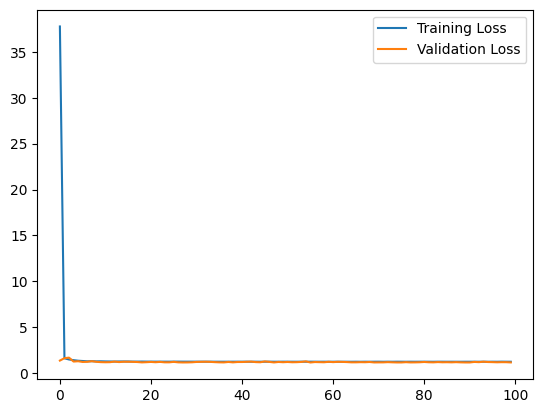

In [29]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [30]:
# Generate predictions
predictions = model.predict(X_val)

# Calculate F1 score, AUPRC, and accuracy for validation set
f1_scores = []
auprcs = []
accuracies = []

for i in range(num_tasks):
    y_true = y_val[:, i]
    y_pred = (predictions[i] > 0.5).astype(int)
    f1 = f1_score(y_true, y_pred)
    auprc = average_precision_score(y_true, predictions[i])
    accuracy = accuracy_score(y_true, y_pred)
    f1_scores.append(f1)
    auprcs.append(auprc)
    accuracies.append(accuracy)

avg_f1 = sum(f1_scores) / num_tasks
avg_auprc = sum(auprcs) / num_tasks
avg_accuracy = sum(accuracies) / num_tasks

print(f"Avg F1-Score: {avg_f1:.4f}")
print(f"Avg AUPRC: {avg_auprc:.4f}")
print(f"Avg Accuracy: {avg_accuracy:.4f}")

245/245 [==============================] - 1s 2ms/step
Avg F1-Score: 0.3519
Avg AUPRC: 0.3742
Avg Accuracy: 0.8519


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
